## Chronic Kidney Disease Dataset analysis

This notebook analyzes dataset obtained from patients diagnosed with Chronic Kidney Diease (CKD). The dataset includes demographic details, lifestyle factors, medical history, clinical measurements, medication usage, symptoms, quality of life scores, environmental exposures, and health behaviors.

Source: https://www.kaggle.com/datasets/rabieelkharoua/chronic-kidney-disease-dataset-analysis

Contributors: Adithya Hadidi, Kateryna Skoropad, Zarrin Rasizadeh, Anjali Deshpande

In [2]:
# Import standard libraries in this section
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


## Data exploration

In [3]:
df = pd.read_csv("../data/raw/Chronic_Kidney_Dsease_data.csv")

df

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1654,1655,90,0,0,1,2,39.677059,1,1.370151,4.157954,...,2.138976,81.102765,0,0,0,0.951836,9.547583,2.046212,0,Confidential
1655,1656,34,0,0,2,1,28.922015,0,3.372073,9.647525,...,7.911566,10.600428,0,1,0,3.604147,1.609847,0.324417,0,Confidential
1656,1657,84,0,0,2,3,21.951219,0,15.825955,7.349964,...,0.015531,69.633427,0,0,0,0.801955,5.768617,4.935108,0,Confidential
1657,1658,90,0,0,2,2,24.964149,0,12.967462,0.618614,...,3.432765,31.858023,0,0,0,0.560298,2.744519,0.322592,1,Confidential


In [4]:
df.shape # number of rows and columns

(1659, 54)

In [5]:
df.head()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,...,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,...,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,...,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,...,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,...,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [6]:
# summary of the DataFrame (data types and number of non-null values in each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [7]:
# statistical summaries of the numerical columns
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,...,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,...,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,...,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,...,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,...,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,...,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,...,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,...,5.254956,7.552093,73.913997,0.000000,0.000000,0.000000,2.947213,7.499783,7.733253,1.000000
max,1659.000000,90.000000,1.000000,3.00000,2.000000,3.000000,39.993532,1.000000,19.992713,9.998167,...,6.984636,9.998313,99.987510,1.000000,1.000000,1.000000,3.999469,9.992345,9.993754,1.000000


## 1. Data Cleaning and Preprocessing

Drop *PatientID* and *DoctorInCharge* columns since they don't provide any information. Also cleaning the data makes it readily usable.

In [8]:
# Display the summary statistics of the dataset
columns_to_drop = ["DoctorInCharge","PatientID"]
df = df.drop(columns_to_drop, axis = 1)
random_seed=42
np.random.seed(random_seed)

In [9]:
print(df.shape)

(1659, 52)


In [10]:
df.isnull().sum()

Age                              0
Gender                           0
Ethnicity                        0
SocioeconomicStatus              0
EducationLevel                   0
BMI                              0
Smoking                          0
AlcoholConsumption               0
PhysicalActivity                 0
DietQuality                      0
SleepQuality                     0
FamilyHistoryKidneyDisease       0
FamilyHistoryHypertension        0
FamilyHistoryDiabetes            0
PreviousAcuteKidneyInjury        0
UrinaryTractInfections           0
SystolicBP                       0
DiastolicBP                      0
FastingBloodSugar                0
HbA1c                            0
SerumCreatinine                  0
BUNLevels                        0
GFR                              0
ProteinInUrine                   0
ACR                              0
SerumElectrolytesSodium          0
SerumElectrolytesPotassium       0
SerumElectrolytesCalcium         0
SerumElectrolytesPho

In [11]:

# Specify the response variable and features
response_column_name = 'Diagnosis'
# All variables except 'Diagnosis' is predictor
predictors = [col for col in df.columns if col != response_column_name]

# Split data into features and target variable
X = df[predictors]
y = df[response_column_name]

## 2. Univariate Analysis

(Source: https://www.geeksforgeeks.org/what-is-exploratory-data-analysis/)

### Summary Statistics

Display summary statistics for numerical and categorical columns

Display each feature with its count, mean, std deviation, min, max and 25%, 50%, 75% percentiles indicating the distribution of values.

In [12]:

# Display all columns 
pd.set_option('display.max_columns', None)  # None means unlimited
pd.set_option('display.width', None)  # None means unlimited width
df.describe(exclude=None)


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,72.000000,1.000000,1.00000,2.000000,2.000000,34.015849,1.000000,14.967100,7.460563,7.428290,8.346298,0.

### Data Visualization

For the numerical variables, visualizing distributions using histograms, box plots, or density plots to understand the spread and skewness of data.

#### Histograms

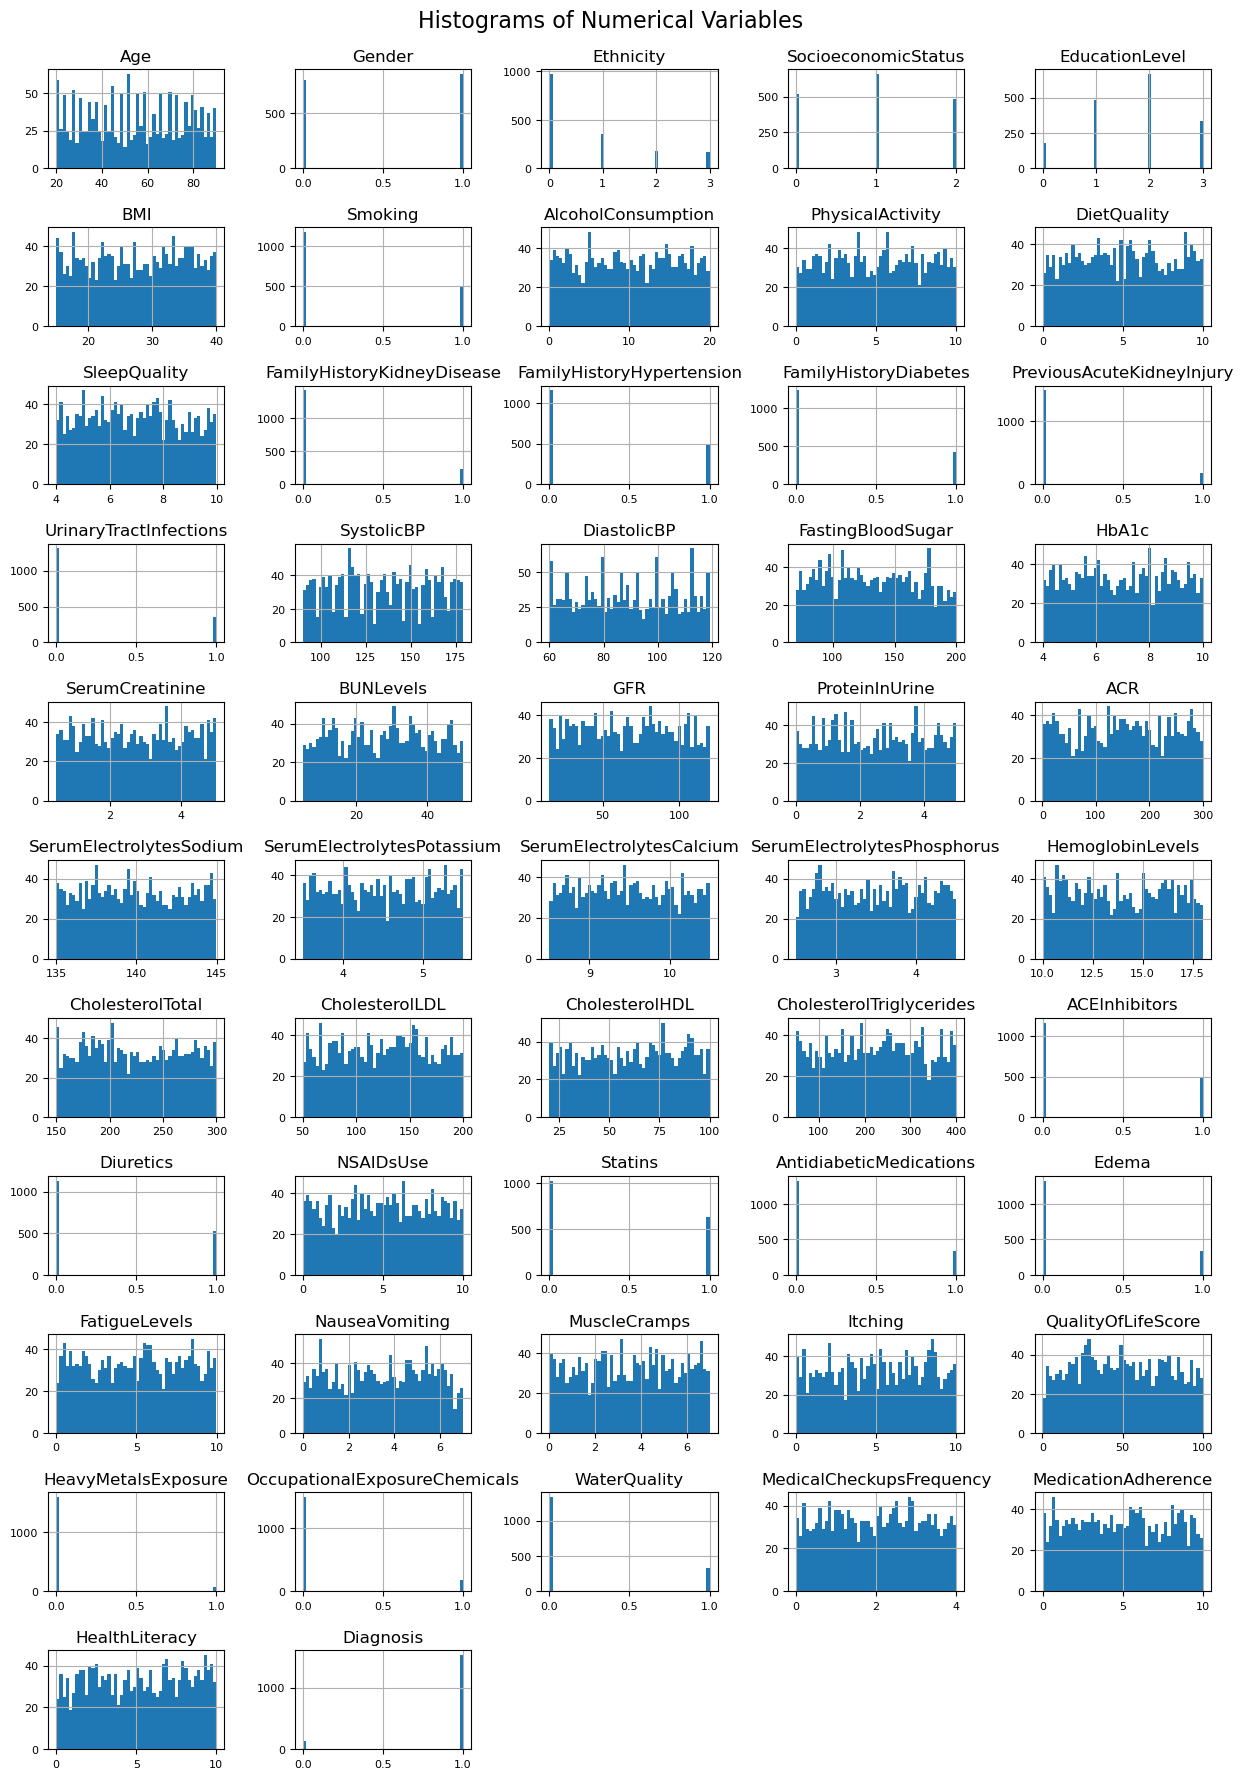

In [13]:

# Distribution of numerical variables in the df dataset
# Each histogram represents the frequency distribution of a numerical variable to gain insights into data distribution and skewness of data

df.hist(figsize=(15, 20), bins=50, xlabelsize=8, ylabelsize=8, layout=(len(df.columns) // 5 + 1, 5))
plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)
plt.show()


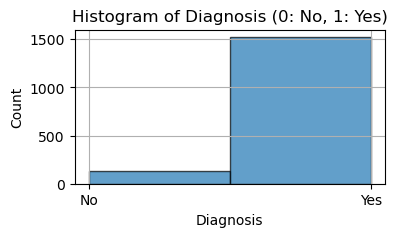

In [14]:
# Add code for histogram showing 'Diagnosis' as x-axis and count as y-axis
# Plotting the histogram for 'Diagnosis'
plt.figure(figsize=(4, 2))
plt.hist(df['Diagnosis'], bins=2, edgecolor='black', alpha=0.7, align='mid')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Histogram of Diagnosis (0: No, 1: Yes)')
plt.xticks([0, 1], ['No', 'Yes'])  # Replace x-axis ticks with 'No' and 'Yes'
plt.grid(True)
plt.show()

This histogram illustrates the distribution of diagnosis in the dataset, categorized as 'No' (0) and 'Yes' (1). The majority of cases fall under 'Yes', indicating a predominant occurance of positive
diagnoses compared to negative diagnoses, and therefore a skewed distribution towards positive diagnoses in the dataset.

#### Scatter plots

This dataset contains large number of clinical measurements. For simplicity, lets just take 'GFR' and 'ProteinInUrine' to draw a scatter plot

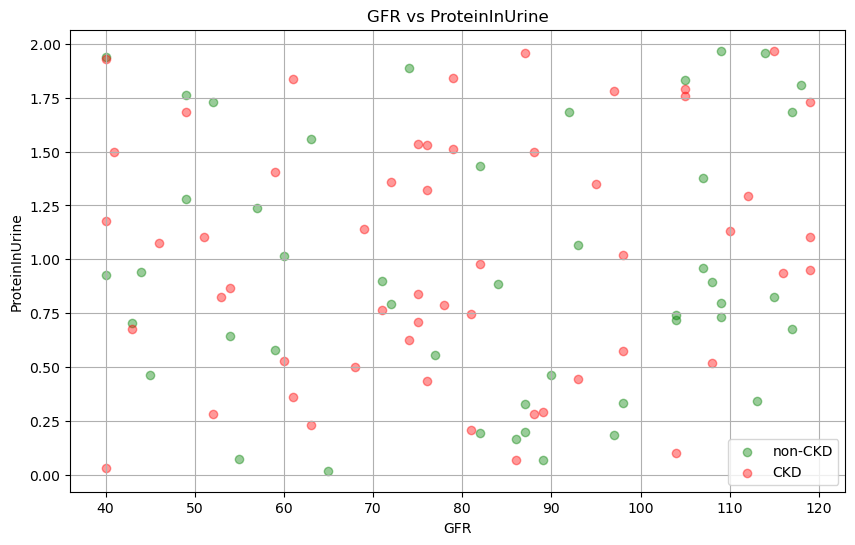

Correlation Coefficient between GFR and ProteinInUrine: 0.06737288430312952


In [15]:
np.random.seed(0)
df_plot = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'ProteinInUrine': np.random.uniform(0, 2, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df_plot[df_plot['CKD'] == 0]
ckd_data = df_plot[df_plot['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['ProteinInUrine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['ProteinInUrine'], color='red', alpha=0.4, label='CKD')
plt.title('GFR vs ProteinInUrine')
plt.xlabel('GFR')
plt.ylabel('ProteinInUrine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df_plot['GFR'].corr(df_plot['ProteinInUrine'])
print(f"Correlation Coefficient between GFR and ProteinInUrine: {correlation_coefficient}")

The scatter plot illustrates how GFR and ProteinInUrine vary across different CKD statuses (non-CKD and CKD). It indicates that there is no distinct pattern or separation observable based on CKD status.A correlation coefficient of 0.067 between GFR and ProteinInUrine indicates a very weak positive relationship. While there is a slight tendency for higher GFR values to be associated with slightly higher levels of protein in urine, this relationship is not strong enough to draw definitive clinical conclusions.

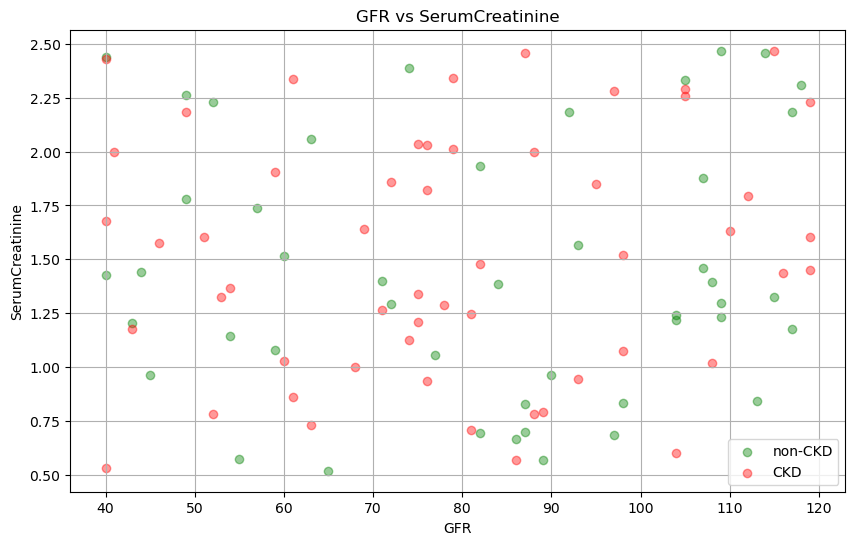

Correlation Coefficient between GFR and SerumCreatinine: 0.06737288430312952


In [16]:
np.random.seed(0)
df_plot = pd.DataFrame({
    'GFR': np.random.randint(40, 120, 100),
    'SerumCreatinine': np.random.uniform(0.5, 2.5, 100),
    'CKD': np.random.choice([0, 1], 100)
})

# Separate data into CKD and non-CKD groups
non_ckd_data = df_plot[df_plot['CKD'] == 0]
ckd_data = df_plot[df_plot['CKD'] == 1]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(non_ckd_data['GFR'], non_ckd_data['SerumCreatinine'], color='green', alpha=0.4, label='non-CKD')
plt.scatter(ckd_data['GFR'], ckd_data['SerumCreatinine'], color='red', alpha=0.4, label='CKD')

plt.title('GFR vs SerumCreatinine')
plt.xlabel('GFR')
plt.ylabel('SerumCreatinine')
plt.grid(True)
plt.legend()
plt.show()

correlation_coefficient = df_plot['GFR'].corr(df_plot['SerumCreatinine'])
print(f"Correlation Coefficient between GFR and SerumCreatinine: {correlation_coefficient}")


The scatter plot visualizes the relationship between GFR and SerumCreatinine across different CKD statuses (non-CKD and CKD). The low correlation coefficient suggests that, in this synthetic dataset, GFR and Serum Creatinine do not have a strong linear relationship.
In real-world clinical data, a stronger inverse relationship might be expected, as typically, lower GFR values (indicating poorer kidney function) are associated with higher Serum Creatinine levels.

#### Frequency plots

For categorical variables, Frequency tables and bar charts to examine the distribution of categorical variables such as Gender, Ethnicity, Education Level, Smoking status, etc.

Distribution summary or frequency table for all the categorical variables

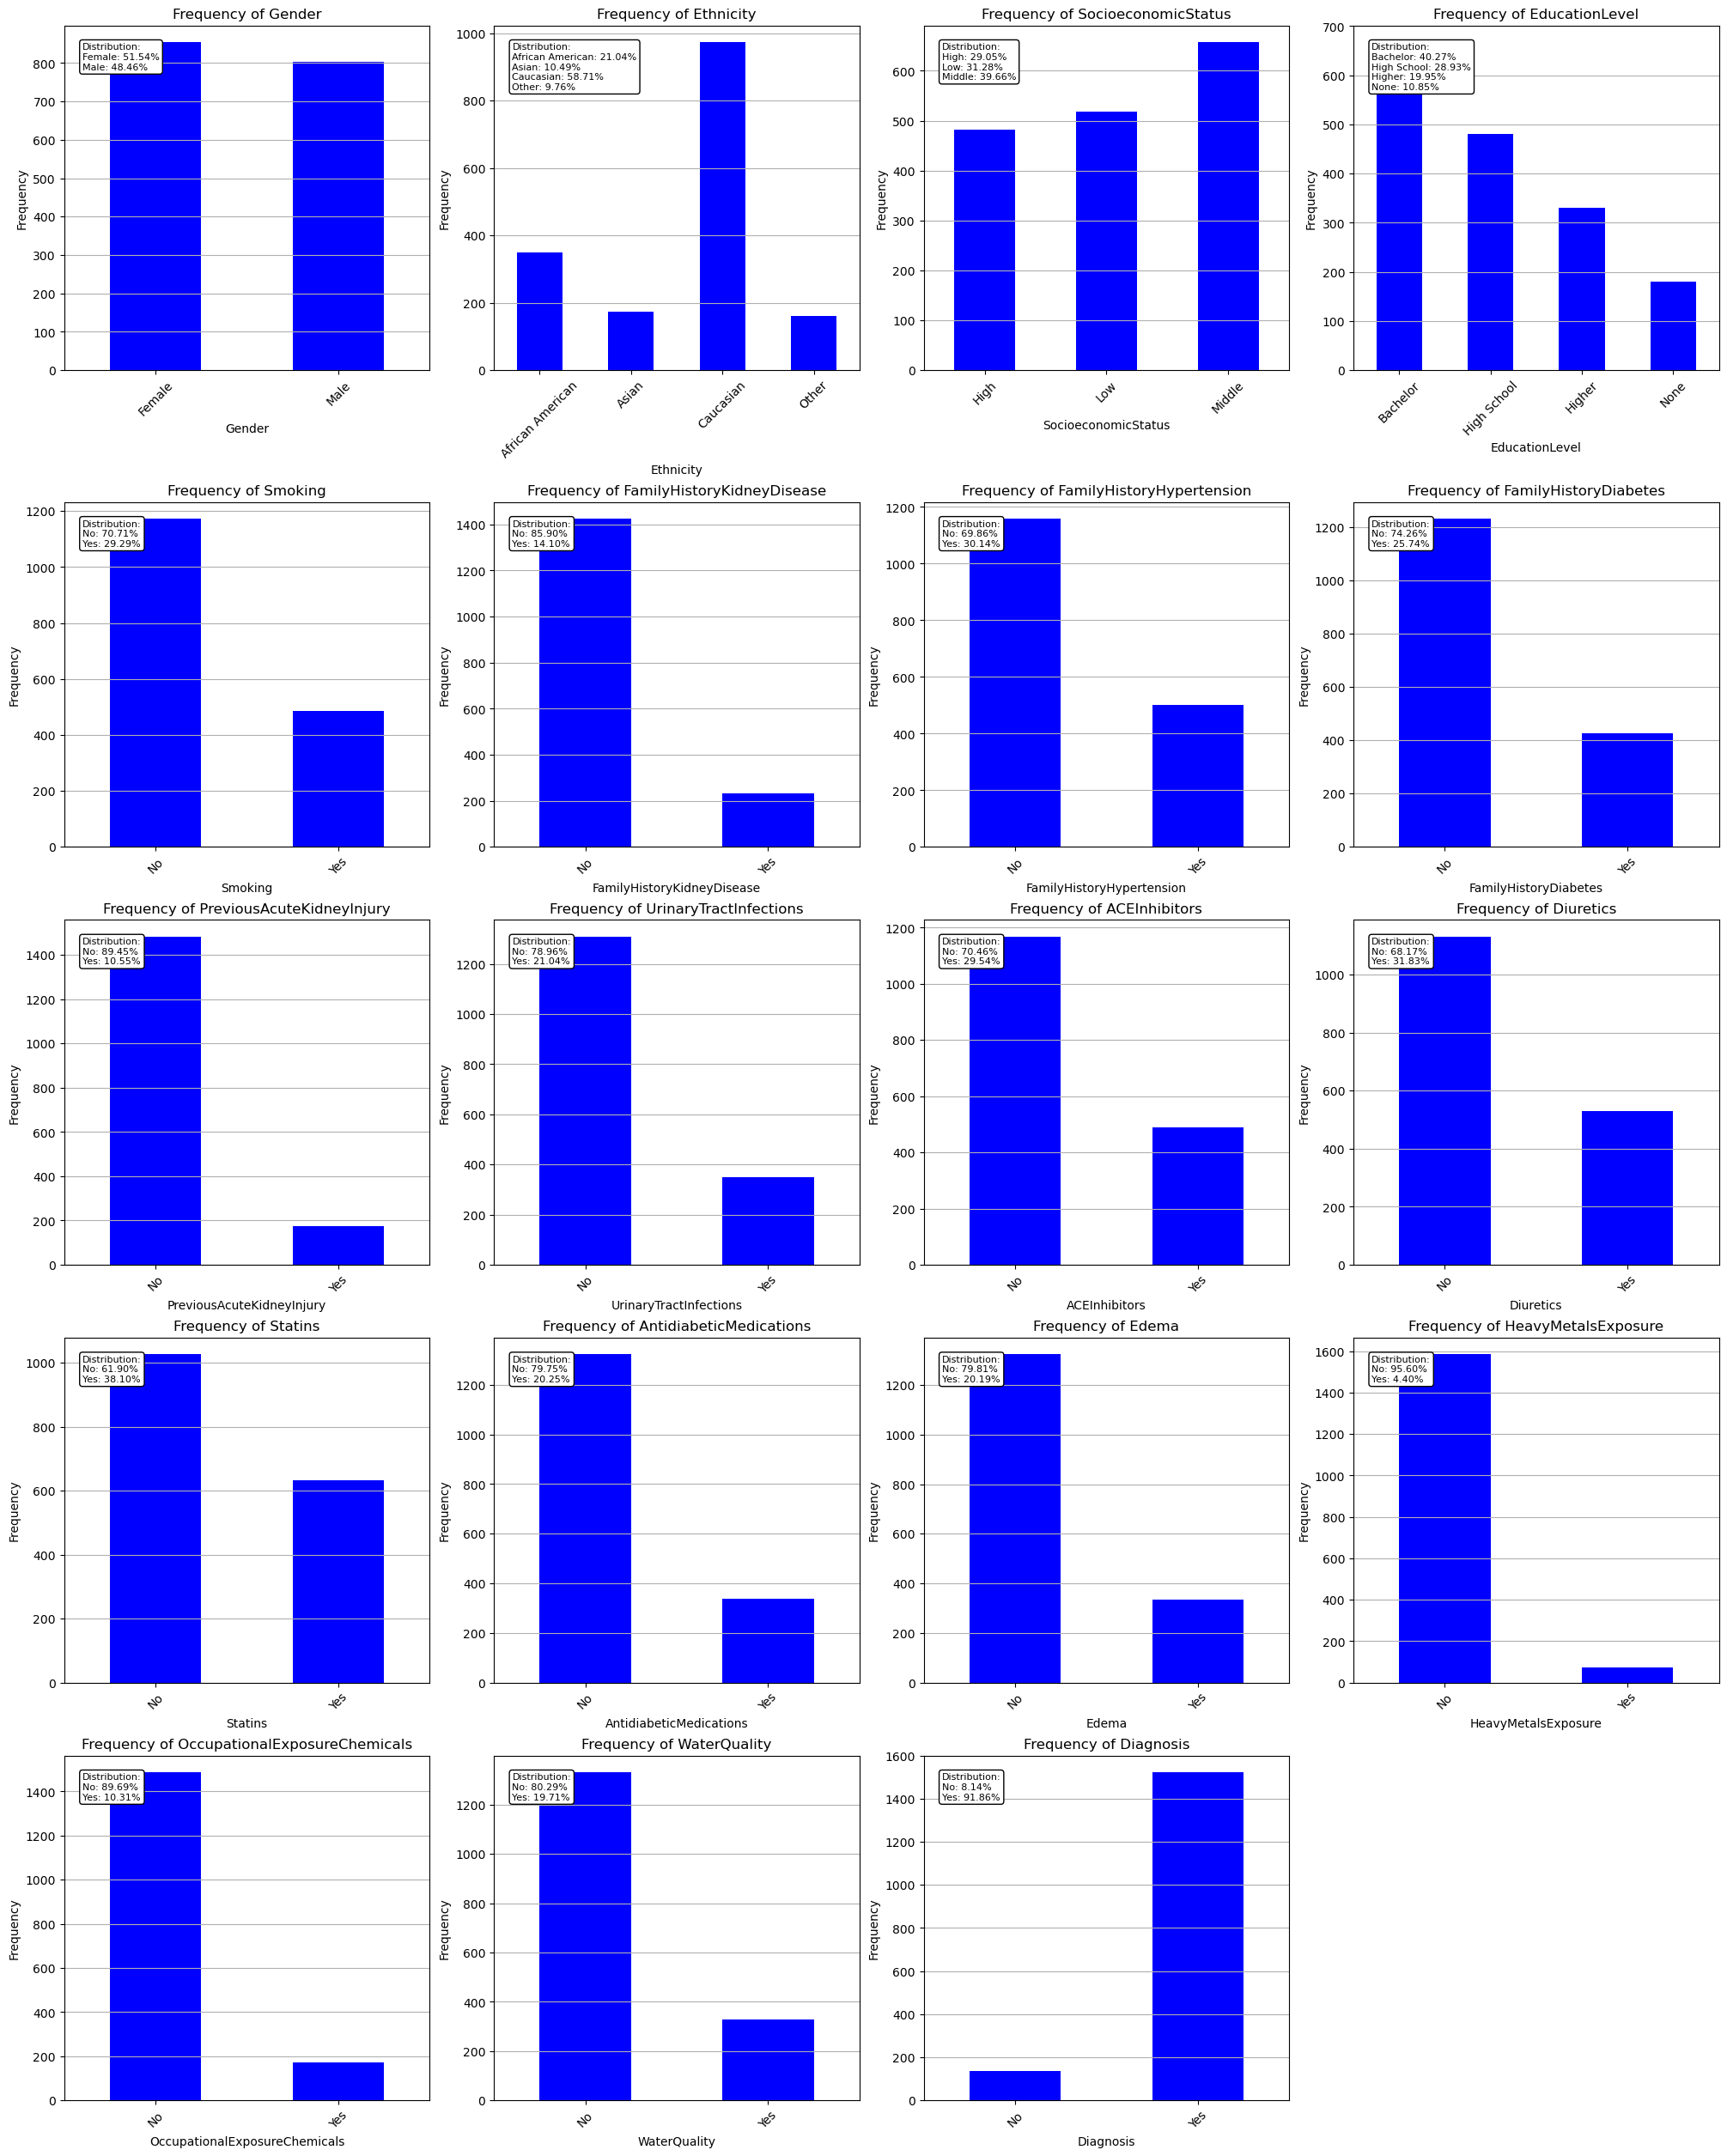

In [17]:
# Add code for frequency tables/bar charts for categorical

# Define mappings for each categorical variable

category_mappings = {
    'Gender': {0: 'Male', 1: 'Female'},
    'Ethnicity': {0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'},
    'SocioeconomicStatus': {0: 'Low', 1: 'Middle', 2: 'High'},
    'EducationLevel':{0: 'None', 1: 'High School', 2: 'Bachelor', 3: 'Higher'},
    'Smoking': {0: 'No', 1: 'Yes'},
    'FamilyHistoryKidneyDisease':{0: 'No', 1: 'Yes'},
    'FamilyHistoryHypertension': {0: 'No', 1: 'Yes'},
    'FamilyHistoryDiabetes': {0: 'No', 1: 'Yes'},
    'PreviousAcuteKidneyInjury': {0: 'No', 1: 'Yes'},
    'UrinaryTractInfections': {0: 'No', 1: 'Yes'},
    'ACEInhibitors': {0: 'No', 1:'Yes'},
    'Diuretics': {0: 'No', 1:'Yes'},
    'Statins': {0: 'No', 1:'Yes'},
    'AntidiabeticMedications': {0: 'No', 1:'Yes'},
    'Edema': {0: 'No', 1:'Yes'},
    'HeavyMetalsExposure': {0: 'No', 1:'Yes'},
    'OccupationalExposureChemicals': {0: 'No', 1:'Yes'},
    'WaterQuality': {0: 'No', 1:'Yes'},
    'Diagnosis': {0: 'No', 1:'Yes'}
    }

# List of categorical features

categorical_features = [
    # demographic
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    # Lifestyle
    'Smoking', 
    # Medical History
    'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 
    'UrinaryTractInfections',
    # Medications
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    # Symptoms and Quality of Life
    'Edema', 
    # Environmental and Occupational Exposures
    'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality',
    # Diagnosis
    'Diagnosis'
    ]
    
# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 5, num_rows * 5), constrained_layout=True)
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot frequency tables and bar charts with updated labels
for idx, feature in enumerate(categorical_features):
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})

    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Create distribution summary
    prop_table = (df_mapped[feature].value_counts(normalize=True) * 100).sort_index()
    
    # Plotting
    ax = axes[idx]
    
    freq_table.plot(kind='bar', color='blue', ax=ax)
    ax.set_title(f'Frequency of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(axis='y')
    
    # Display distribution summary
    summary_text = '\n'.join([f'{category}: {prop:.2f}%' for category, prop in prop_table.items()])
    ax.text(0.05, 0.95, f'Distribution:\n{summary_text}', transform=ax.transAxes,
            fontsize=8, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Remove empty subplots if the number of features is less than grid size
for ax in axes[num_features:]:
    fig.delaxes(ax)

plt.show()



The distribution summary of gender indicates that 

* Females constitute about 51.54% and males 48.46% of the dataset, and suggests a balanced representation of gender within the analyzed population.

* Majority of individuals in the dataset are Caucasian (58.71%), followed by African American (21.04%), Asian (10.49%), and Other ethnicities (9.76%).

* Socioeconomic status is evenly distributed among high (29.05%), low (31.28%), and middle (39.66%) categories in the dataset.

* Education levels vary, with a significant proportion holding bachelor's degrees (40.27%), followed by high school (28.93%), higher education (19.95%), and no formal education (10.85%).

* The majority of individuals in the dataset do not smoke (70.71%), while 29.29% are smokers.

*  A large majority of individuals (85.90%) have no family history of kidney disease, while 14.10% have a positive family history.

* Most individuals (69.86%) do not have a family history of hypertension, whereas 30.14% do.

* A significant majority of individuals (74.26%) do not have a family history of diabetes, while 25.74% do.

* The majority of individuals (89.45%) have no history of previous acute kidney injury, while 10.55% have experienced it.

* Most individuals (78.96%) have not had urinary tract infections, while 21.04% have.

* A significant proportion of individuals (70.46%) are not using ACE inhibitors, while 29.54% are.

* The majority of individuals (68.17%) are not using diuretics, while 31.83% are.

* A significant proportion of individuals (61.90%) are not using statins, while 38.10% are.

* Most individuals (79.75%) are not using antidiabetic medications, while 20.25% are.

* The majority of individuals (79.81%) do not exhibit edema, while 20.19% do.

* A large majority of individuals (95.60%) have not been exposed to heavy metals, while 4.40% have.

* Most individuals (89.69%) have not been exposed to chemicals occupationally, while 10.31% have.

* The majority of individuals (80.29%) do not have concerns about water quality, while 19.71% do.

#### Bar plots

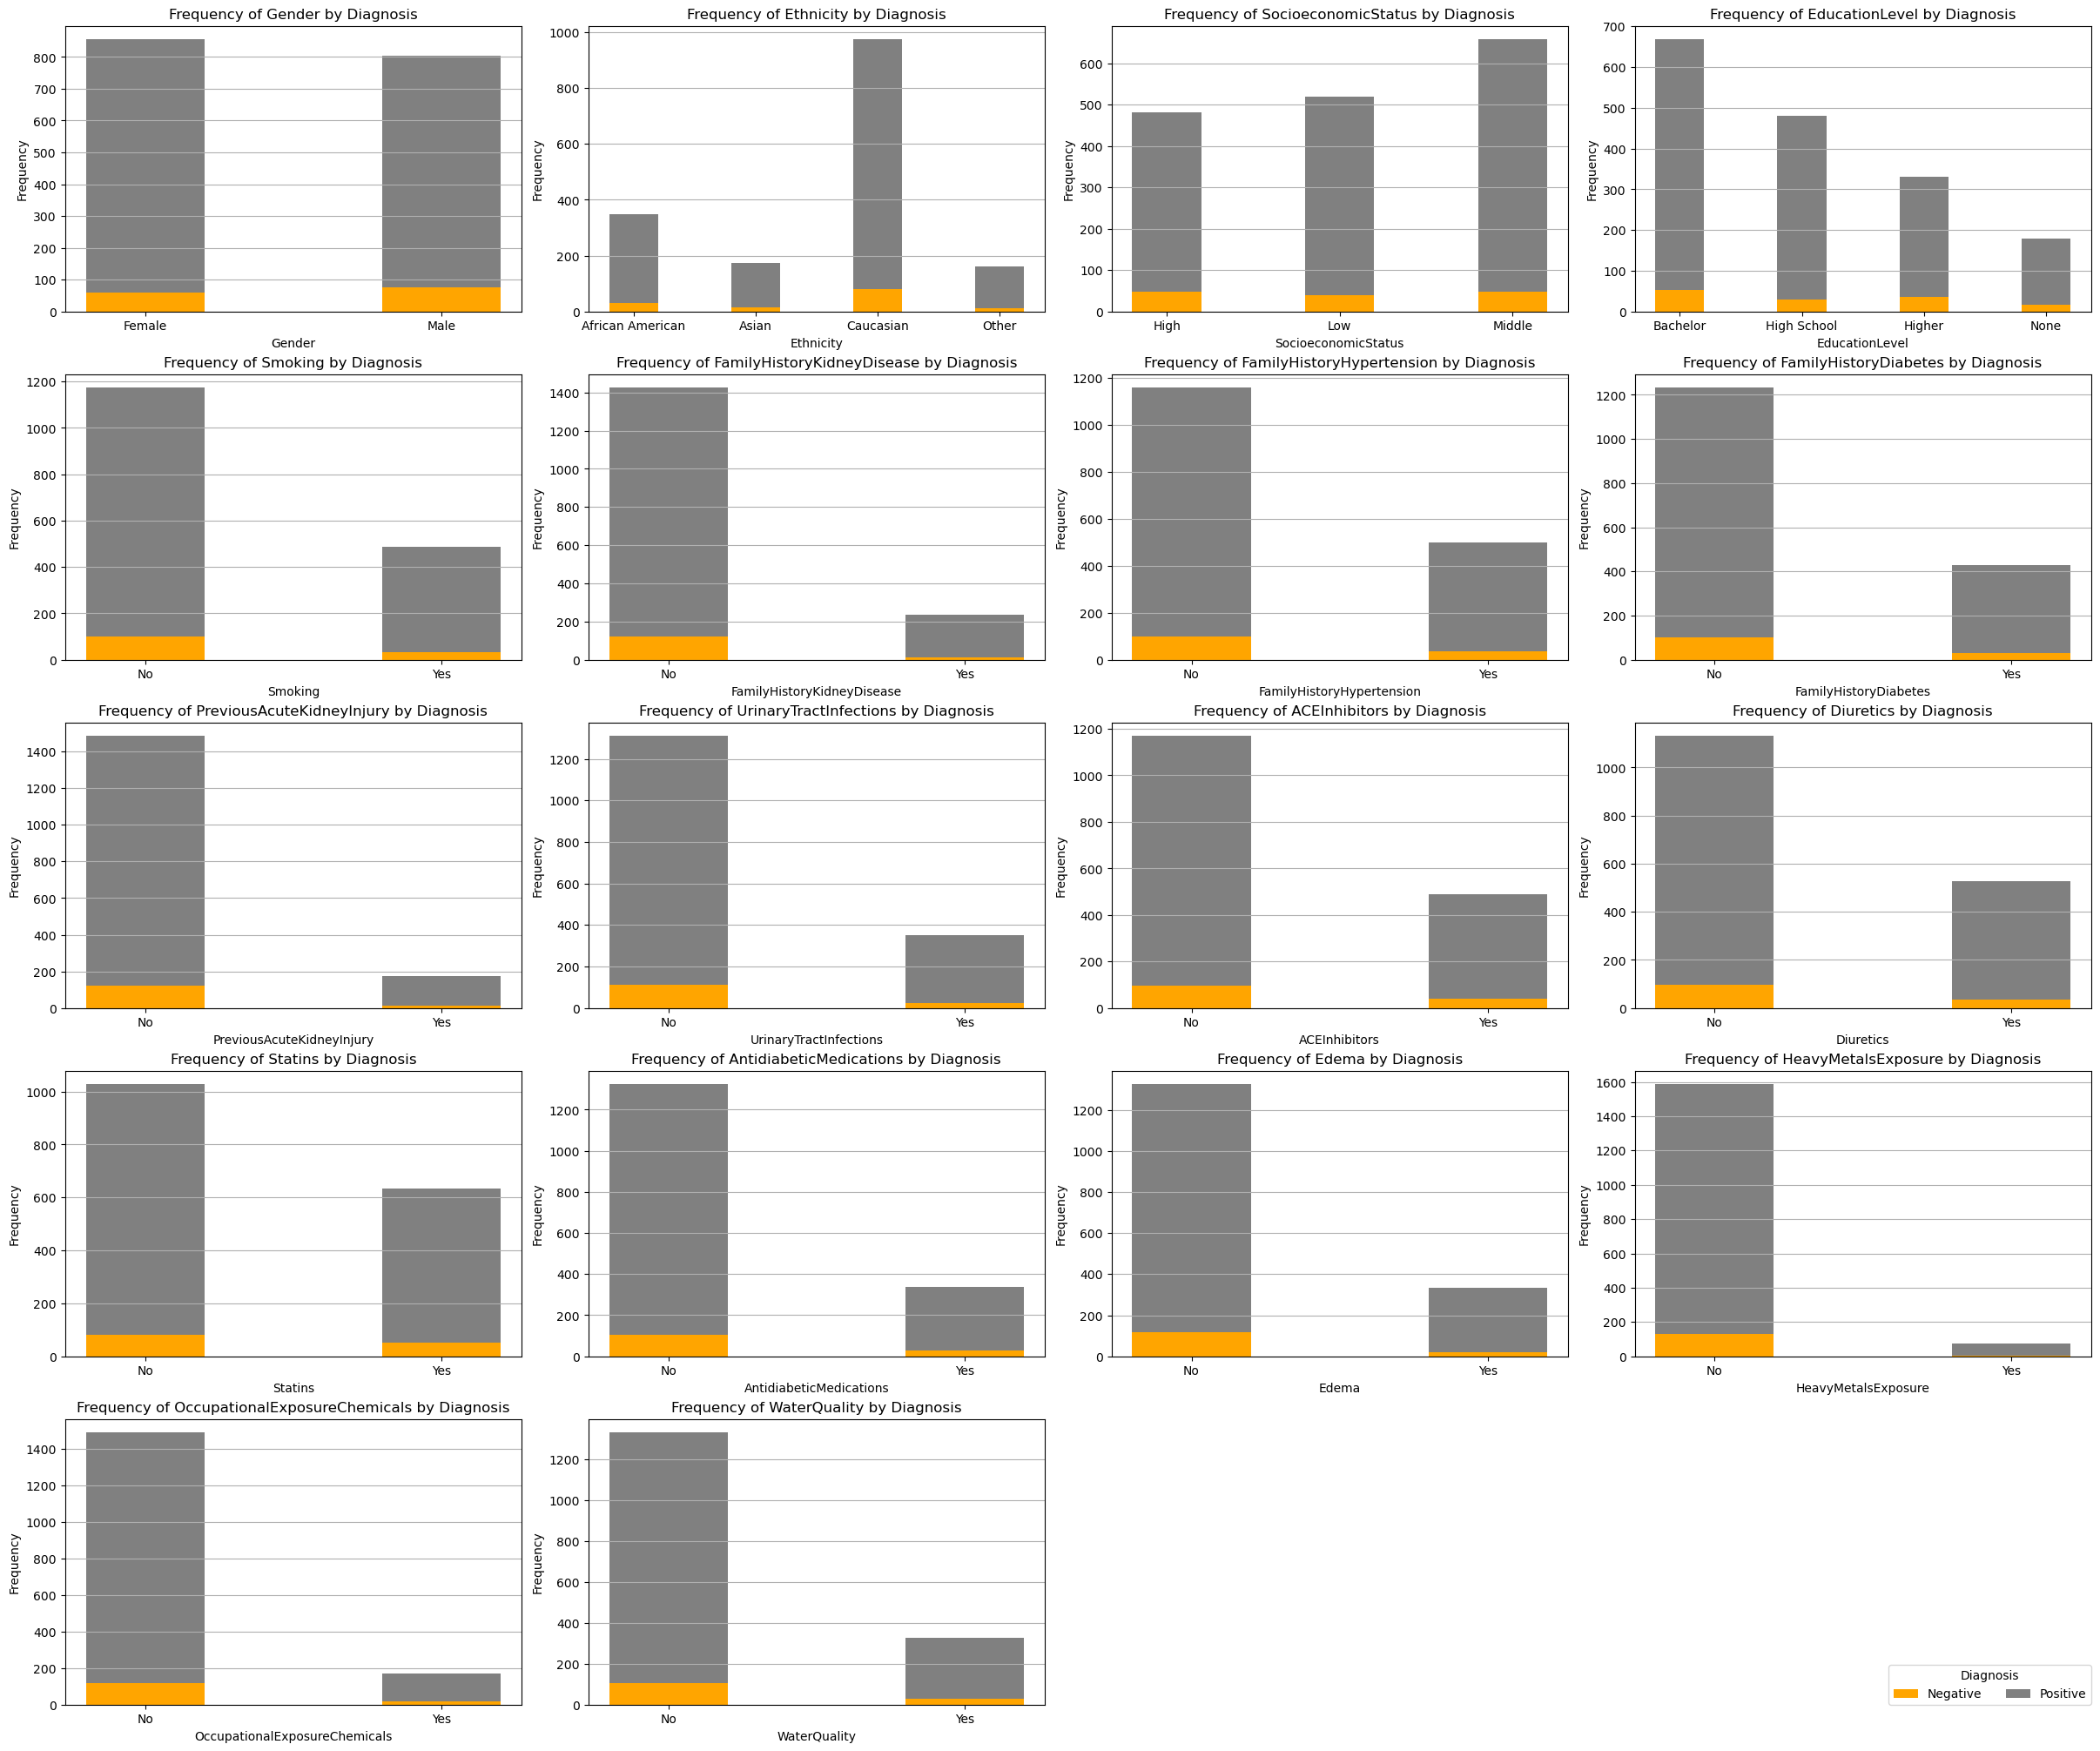

In [18]:
# Distribution of categorical variables by Diagnosis
# List of categorical features
categorical_features = [
    'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel',
    'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications',
    'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality'
]

# Determine grid size
num_features = len(categorical_features)
num_cols = 4  # Number of columns in the grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate rows needed

# Create a figure with a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 6, num_rows * 4), constrained_layout=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot frequency tables and bar charts with updated labels
for idx, feature in enumerate(categorical_features):
    # Apply mappings to replace numeric codes with labels
    df_mapped = df.replace({feature: category_mappings.get(feature, {})})
    
    # Create a frequency table
    freq_table = df_mapped[feature].value_counts().sort_index()

    # Initialize plot with smaller figure size
    #plt.figure(figsize=(6, 4))
    # Plotting on the corresponding subplot
    ax = axes[idx]
    # Loop through each category
    for i, (index, value) in enumerate(freq_table.items()):
        # Calculate counts of positive and negative diagnoses
        positive_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 1)].shape[0]
        negative_count = df_mapped[(df_mapped[feature] == index) & (df_mapped['Diagnosis'] == 0)].shape[0]

        # Plotting stacked bars with thinner width
        bar_neg = ax.bar(index, negative_count, color='orange', width=0.4, label='Negative' if i == 0 else None)
        bar_pos = ax.bar(index, positive_count, bottom=negative_count, color='grey', width=0.4, label='Positive' if i == 0 else None)
                
    
    # Set x-axis ticks and labels
    ax.set_xticks(range(len(freq_table.index)))  # Set the positions of ticks
    ax.set_xticklabels(freq_table.index)         # Set the labels for the ticks
     
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Frequency of {feature} by Diagnosis')
    
    ax.grid(axis='y')
    

# Add a single legend for all subplots
fig.legend([bar_neg, bar_pos], ['Negative', 'Positive'], title='Diagnosis', loc='upper center', bbox_to_anchor=(0.95, 0.05), ncol=2)

# Remove empty subplots if the number of features is less than grid size
for ax in axes[num_features:]:
    fig.delaxes(ax)    
plt.show()

Stacked Bar Charts above visulize the distribution of various categorical variables in relation to the diagnosis outcome where Orange bars represent the frequency of negative diagnoses and Grey bars

represent the frequency of positive diagnoses.

## 3. Bivariate Analysis

### 1. Correlation Analysis

#### Pearson correlation matrix

Compute Pearson correlation coefficients between pairs of numerical variables (All variables or a set of variables: e.g., Serum Creatinine vs. GFR, Blood Pressure vs. GFR) to understand relationships.


In [19]:

# Standardize the columns (normalize) before finding correlation
scaler = StandardScaler()
df_standardized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Add correlation matrix
correlation_matrix = df_standardized.corr()
print("Pearson Correlation Matrix:")
display(correlation_matrix)



Pearson Correlation Matrix:


,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
Age,1.000000,-0.037765,-0.006307,0.001448,0.008947,-0.033202,0.020215,-0.006030,0.003485,0.004062,-0.005151,0.014984,-0.008672,0.001114,0.028253,0.042979,0.050918,0.007282,-0.006815,0.026093,-0.019612,-0.041336,0.045831,-0.021659,-0.032800,0.004838,-0.003220,0.028401,-0.039311,0.011719,-0.023106,0.001591,-0.015607,-0.021061,-0.001364,0.004348,0.019042,0.000734,-0.015058,-0.016797,0.002977,-0.029556,0.001318,0.005683,-0.022676,0.043746,-0.014711,-0.038522,-0.015165,0.043168,0.010920,0.000919
Gender,-0.037765,1.000000,0.025707,0.004767,-0.022095,-0.023381,0.004054,-0.020473,0.014840,0.011517,-0.004312,0.032584,-0.007058,0.019137,0.038519,0.021116,0.031253,0.027322,-0.006086,0.003495,0.010221,-0.012786,0.030294,0.012642,-0.017650,0.018728,0.026549,0.009740,-0.018112,0.006620,0.037077,0.012775,0.033222,-0.034570,0.011813,0.061844,-0.003433,-0.004258,0.026516,0.013072,-0.003961,0.000570,-0.028158,0.001424,0.015554,0.013984,-0.000509,0.019628,0.020156,-0.026356,-0.014644,0.042239
Ethnicity,-0.006307,0.025707,1.000000,-0.047051,0.039696,-0.008506,0.019127,-0.033574,-0.057811,-0.012721,0.029833,0.010630,-0.021725,0.007602,0.025920,-0.024939,-0.017903,0.016126,0.038599,0.050558,-0.019571,0.023219,0.004514,-0.005262,-0.034707,-0.000465,0.008823,-0.010712,0.004365,-0.021487,0.050441,-0.014540,0.012009,-0.007313,0.028524,-0.029121,0.048621,0.000414,0.018603,-0.022343,-0.060223,0.013447,-0.004542,-0.031039,0.010930,0.008654,0.010036,-0.036629,0.023191,0.007489,0.012971,0.007199
SocioeconomicStatus,0.001448,0.004767,-0.047051,1.000000,-0.003711,-0.030242,0.021900,0.010864,-0.000259,-0.000394,-0.019183,-0.041888,-0.004820,0.054200,0.030082,-0.008031,-0.023491,0.019670,-0.045426,0.000801,-0.017501,0.045003,0.016207,0.001996,0.003091,-0.020260,-0.020116,-0.035272,-0.026572,-0.010521,-0.062895,0.050025,-0.015586,-0.033922,-0.023946,-0.067039,0.017293,0.008145,-0.006773,-0.026162,-0.015654,0.002195,-0.026640,-0.003762,-0.007924,0.036443,-0.013242,-0.005283,0.002820,0.009689,-0.022453,-0.034104
EducationLevel,0.008947,-0.022095,0.039696,-0.003711,1.000000,-0.016669,0.003070,0.046814,-0.003066,-0.013261,-0.003333,-0.015611,-0.028275,-0.012103,0.029514,-0.012872,0.014516,-0.006849,0.013999,0.010064,-0.006992,-0.021090,0.027940,-0.005571,-0.004994,0.011247,-0.006916,-0.000648,-0.037646,0.024930,-0.044451,-0.012215,0.001961,-0.015520,0.026615,0.004259,0.013555,-0.002857,-0.027863,0.009537,-0.014135,-0.021006,0.018786,0.004209,-0.016503,-0.047143,0.020611,-0.029415,0.022940,-0.005434,-0.000944,-0.037343
BMI,-0.033202,-0.023381,-0.008506,-0.030242,-0.016669,1.000000,-0.000968,-0.067239,0.003528,0.014539,0.011668,0.026117,-0.001755,-0.010746,-0.018380,0.014210,-0.017086,0.020390,0.022776,0.023096,0.045254,-0.013288,-0.014731,-0.033131,-0.008286,-0.006721,0.015011,0.017683,0.007203,-0.006558,0.012093,-0.012308,0.017027,0.040651,0.021327,0.014613,-0.003156,-0.037799,0.073360,0.012131,0.009345,0.023334,-0.030355,0.023998,-0.046046,-0.032956,0.008763,0.006205,0.002934,0.020329,-0.015661,0.055222
Smoking,0.020215,0.004054,0.019127,0.021900,0.003070,-0.000968,1.000000,0.032707,0.006153,-0.006386,0.013974,-0.024922,0.001519,-0.045710,0.003166,-0.013774,0.0256

#### Top 15 correlations between variables.

This could give us information about what variables to use for building Linear Regression model (for continuous variables) and Linear Regression model (for categorical variable).

In [20]:
# Filter for top absolute correlations
# Example: Top 15 correlations by absolute value
num_top_correlations = 30

# Unstack the correlation matrix to create a Series
unstacked_correlation = correlation_matrix.unstack()

# Filter out diagonal elements where row index equals column index. Excluding self co-relation (For eg: Age with Age)
filtered_correlation = unstacked_correlation[unstacked_correlation.index.get_level_values(0) != unstacked_correlation.index.get_level_values(1)]


# Display the top sorted autocorrelations
top_correlations = filtered_correlation.sort_values(ascending=False, key=lambda x: np.abs(x)) .head(num_top_correlations)

# Drop duplicates based on sorted columns
# Reset index to convert MultiIndex to columns for easier manipulation
correlation_series = top_correlations.reset_index()
# Sort Variable1 and Variable2 to ensure consistent order
correlation_series[['level_0', 'level_1']] = pd.DataFrame(np.sort(correlation_series[['level_0', 'level_1']], axis=1))
unique_correlations = pd.DataFrame(correlation_series.drop_duplicates(subset=['level_0', 'level_1']))
unique_correlations.reset_index(inplace=True)

display(unique_correlations)


,index,level_0,level_1,0
0,0,Diagnosis,SerumCreatinine,0.201125
1,2,Diagnosis,GFR,-0.175988
2,4,Diagnosis,Itching,0.100652
3,6,Diagnosis,FastingBloodSugar,0.095694
4,8,Diagnosis,MuscleCramps,0.094811
5,10,BUNLevels,Diagnosis,0.093097
6,12,Diagnosis,ProteinInUrine,0.090014
7,14,Diagnosis,SystolicBP,0.083528
8,16,Diuretics,GFR,-0.074593
9,18,AntidiabeticMedications,BMI,0.073360


**Observations**

Positive correlation (e.g., 0.201125 between Diagnosis and SerumCreatinine): As SerumCreatinine increases, the Diagnosis tends to increase as well.

Negative correlation (e.g., -0.175988 between Diagnosis and GFR): As GFR increases, the Diagnosis tends to decrease.

The magnitude of the correlation coefficient (correlation) indicates how strong the relationship is between the two features. Values closer to -1 or 1 indicate a stronger correlation, while values closer to 0 indicate a weaker correlation.

#### Heatmap to visualize relationship between predictor variables.

Visualizing a heatmap for correlation between predictor . This helps us understand the relationship between predictor variable and their significance to the response variable ( the column 'Diagnosis', in our case ).


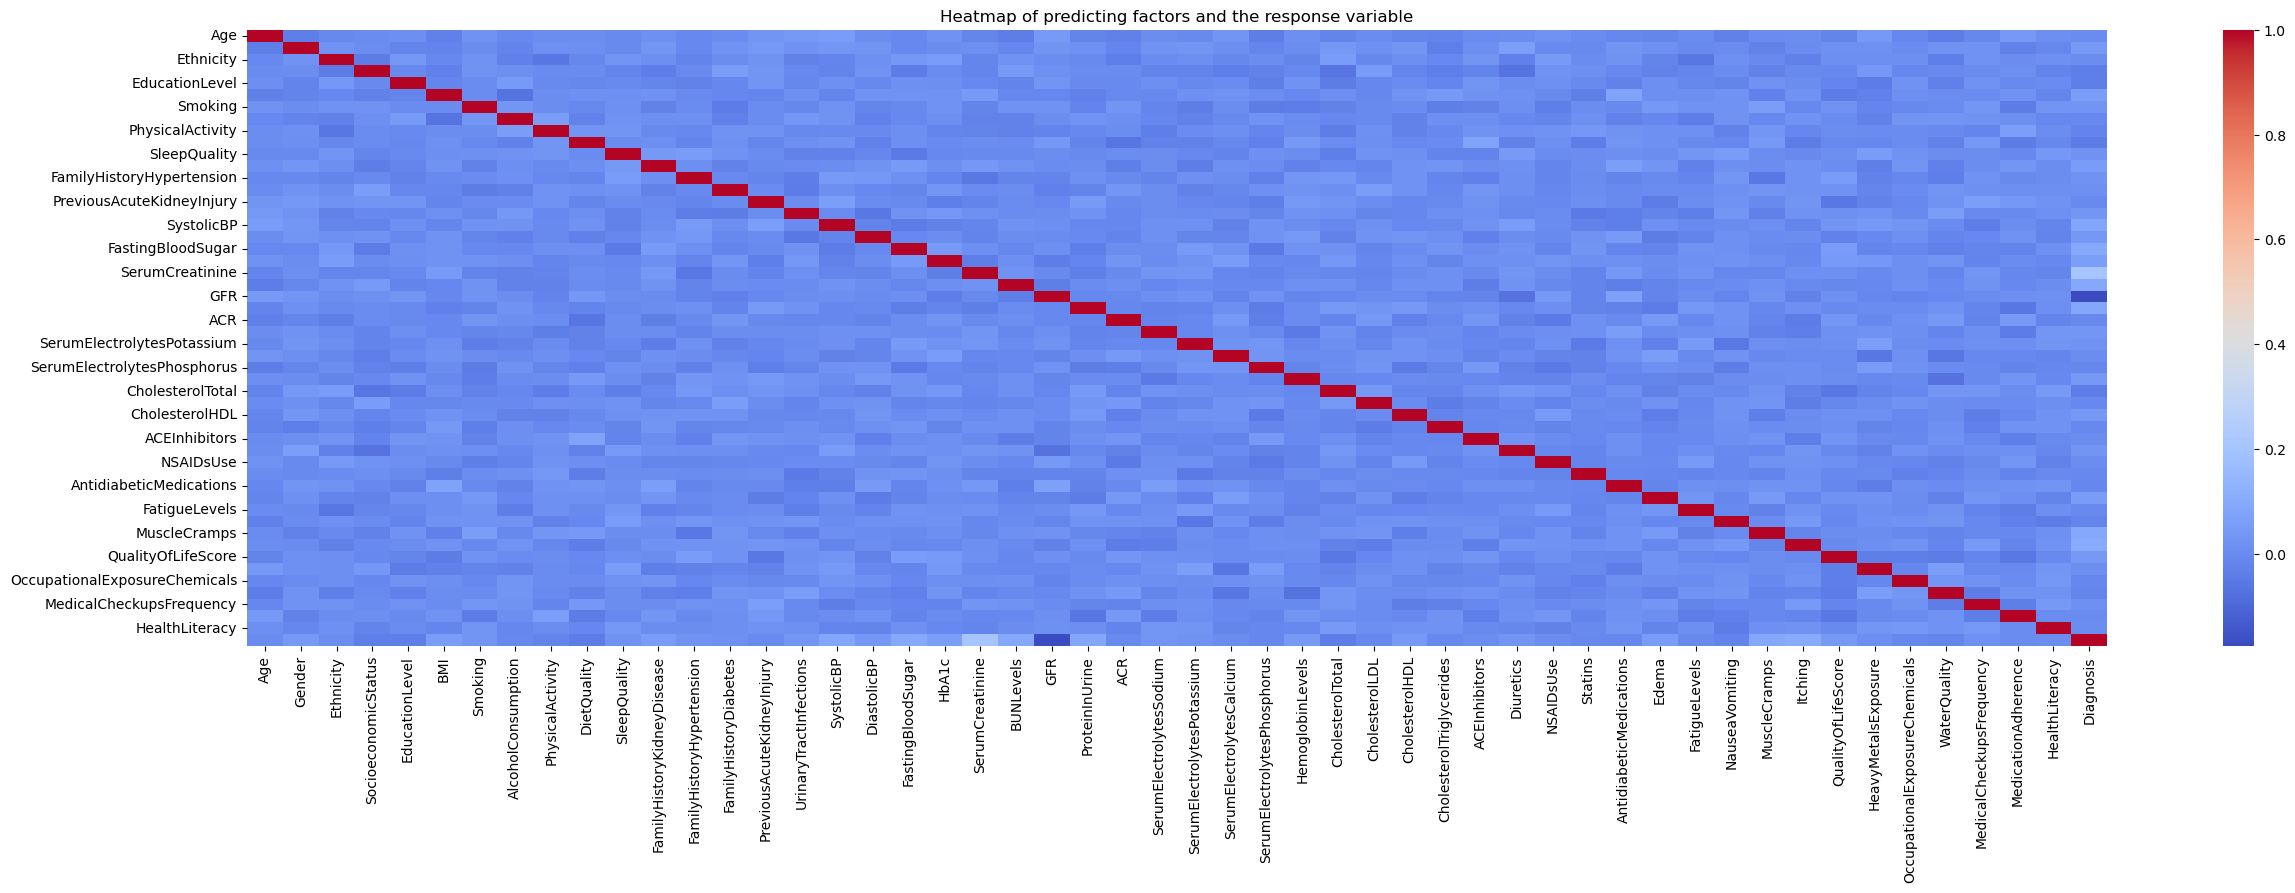

In [21]:
corr_matrix = df_standardized.corr()
plt.figure(figsize=(30, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Heatmap of predicting factors and the response variable')
plt.show()

### 2. Relationships with CKD

#### Box plots

Compare distributions of numerical variables (e.g., Age, BMI, clinical measurements) between CKD and non-CKD groups using box plots.
For example: Boxplot to show distribution of SerumCreatinine levels between patients diagnosed with CKD and those without CKD.
Box-plot make it easy to identify outliers and will help in understanding quality of data


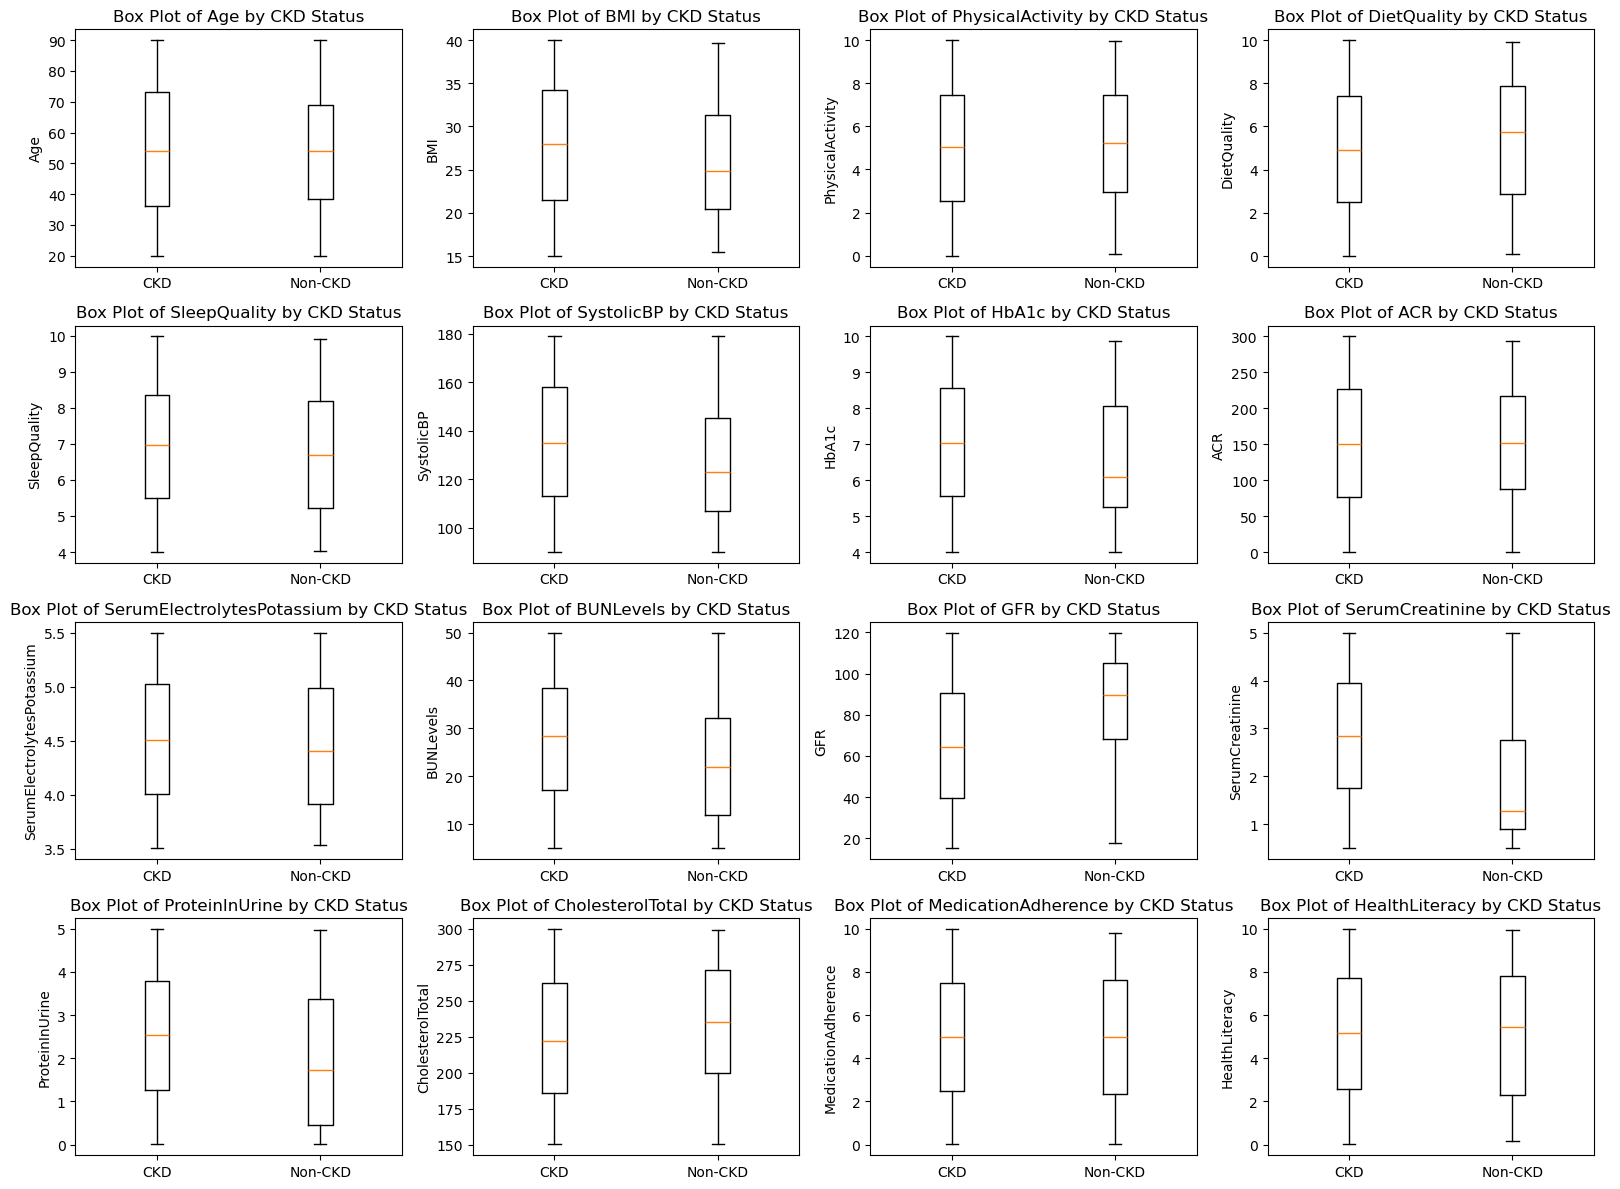

In [22]:
# Add code for box plot

ckd_column = 'Diagnosis'

# Check if the column exists in the DataFrame
if ckd_column in df.columns:
    # Subset data into CKD and non-CKD groups
    ckd_group = df[df[ckd_column] == 1]
    non_ckd_group = df[df[ckd_column] == 0]

    # Numerical columns to compare
    numerical_columns = ['Age', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
                         'HbA1c', 'ACR', 'SerumElectrolytesPotassium', 'BUNLevels', 'GFR', 'SerumCreatinine',
                         'ProteinInUrine', 'CholesterolTotal', 'MedicationAdherence', 'HealthLiteracy']

    # Plotting box plots for each numerical variable
    plt.figure(figsize=(16, 12))  # Increase figsize for better layout

    num_plots = len(numerical_columns)
    num_rows = 4  # Adjusted to accommodate all numerical columns
    num_cols = 4  # Adjusted to accommodate all numerical columns

    for i, column in enumerate(numerical_columns, 1):
        plt.subplot(num_rows, num_cols, i)
        plt.boxplot([ckd_group[column].dropna(), non_ckd_group[column].dropna()],
                    labels=['CKD', 'Non-CKD'])
        plt.title(f'Box Plot of {column} by CKD Status')
        plt.ylabel(column)

    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{ckd_column}' not found in the dataset.")

**Observations**

**Age**:

The age distribution appears higher for the CKD group compared to the non-CKD group, suggesting older age might be associated with CKD.

**BMI (Body Mass Index)**:

Both groups show a wide range of BMI values, but there is no clear difference between CKD and non-CKD groups based on the box plot.

**Physical Activity**:

Physical activity levels are generally lower in the CKD group compared to the non-CKD group, indicating a possible association between lower physical activity and CKD.

**Diet Quality**:

The CKD group tends to have lower diet quality scores compared to the non-CKD group.

**Sleep Quality**:

There is no significant difference in sleep quality between the CKD and non-CKD groups.

**Systolic BP (Blood Pressure)**:

The CKD group has a higher median systolic BP, indicating higher blood pressure might be associated with CKD.

**HbA1c (Glycated Hemoglobin)**:

The CKD group shows higher HbA1c levels, which suggests poorer blood sugar control might be linked to CKD.

**ACR (Albumin-to-Creatinine Ratio)**:

The CKD group has higher ACR values, indicating worse kidney function.

**Serum Electrolytes Potassium**:

Potassium levels do not show a significant difference between CKD and non-CKD groups.

**BUN Levels (Blood Urea Nitrogen)**:

Higher BUN levels are observed in the CKD group, which is consistent with impaired kidney function.

**GFR (Glomerular Filtration Rate)**:

The CKD group has lower GFR values, indicating reduced kidney function.

**Serum Creatinine**:

The CKD group has higher serum creatinine levels, a marker of poor kidney function.

**Protein In Urine**:

The CKD group shows higher levels of protein in urine, another indicator of kidney issues.

**Cholesterol Total**:

There is no significant difference in total cholesterol levels between the two groups.

**Medication Adherence**:

Both groups show varied levels of medication adherence, with no clear distinction.

**Health Literacy**:

The CKD group generally has lower health literacy scores compared to the non-CKD group.

Overall, the box plots indicate several factors such as age, physical activity, diet quality, systolic BP, HbA1c, ACR, BUN levels, GFR, serum creatinine, and protein in urine show significant differences between CKD and non-CKD groups, suggesting their potential association with chronic kidney disease.


# Train, Validation and Test dataset

In [23]:
X.shape, y.shape

((1659, 51), (1659,))

In [24]:
# Split data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [25]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((1061, 51), (1061,), (266, 51), (266,), (332, 51), (332,))

## Models

# Preparing pipelines

SMOTE needs 'imblearn' installed.  'pip install imbalanced-learn'

In [26]:
from sklearn.decomposition import PCA

# Define reprocessing and modeling pipeline for numeric and categorical features. First ensure that all predictor variables 
# are accounted for by checking against lists of numeric, categorical, and binary features. 
# Preprocessing pipeline for numeric and categorical variables
num_cols = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
            'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
            'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
            'SerumElectrolytesSodium', 'DiastolicBP', 'HemoglobinLevels', 
            'NSAIDsUse', 
            'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 
            'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
            'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy',
            ]

cat_cols = ['Ethnicity', 'SocioeconomicStatus', 'EducationLevel'] # non-binary categorical features

# Include all existing binary features here
remainder_cols = [ 'Gender', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
                    'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
                    'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 'Edema',  'HeavyMetalsExposure', 'OccupationalExposureChemicals',
                    'WaterQuality']

# Convert lists to sets
predictors_set = set(predictors)
num_cols_set = set(num_cols)
cat_cols_set = set(cat_cols)
remainder_cols_set = set(remainder_cols)

# Check if all predictors are covered by num_cols and cat_cols
missing_in_combined = predictors_set - num_cols_set.union(cat_cols_set).union(remainder_cols_set)

if not missing_in_combined:
    print("All predictors are covered by num_cols and cat_cols.")
else:
    print("Predictors not covered by num_cols and cat_cols:")
    print(missing_in_combined)


# This function sets up a pipeline that applies StandardScaler to numeric features and OneHotEncoder to 
# categorical features, while leaving binary features unchanged. It then constructs and returns a full 
# pipeline that integrates these preprocessing steps with a specified classifier.
def create_pipeline(classifier, add_pca=False, pca_variance_ratio=0.95):
    
    # Define the preprocessing pipelines for numeric features
    preproc_num_steps = [('scaler', StandardScaler())]

    # Add PCA to numeric pipeline if add_pca is True
    if add_pca: 
        preproc_num_steps.append(('pca', PCA(n_components=pca_variance_ratio)))
    
    pipeline_num = Pipeline(preproc_num_steps)
    
    pipeline_cat = Pipeline([
        ('one_hot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Define ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
                            transformers=[('num_transforms', pipeline_num, num_cols),
                                          ('cat_transforms', pipeline_cat, cat_cols)], 
                            # Leave all other columns (binary features) unchanged
                            remainder='passthrough')   
    
    # Create the full pipeline
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', classifier)
    ])
   
    return pipeline


All predictors are covered by num_cols and cat_cols.


In [94]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE

# This function performs hyperparameter tuning and model evaluation for a given classifier. It applies SMOTE to handle class imbalance, 
# then uses either `GridSearchCV` or `RandomizedSearchCV` to find the best model based on specified parameters and cross-validation strategy. The function 
# evaluates the model's performance on training, validation, and test datasets, reporting accuracy, classification metrics, and ROC AUC scores for each. 
# The best model and its parameters are then returned.
def tune_and_evaluate_model(classifier, param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test, use_random_search=False, use_stratified=True, add_pca=False, pca_variance_ratio=0.95):
    # Apply SMOTE to the training set
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Create pipeline with the classifier
    pipeline = create_pipeline(classifier, add_pca, pca_variance_ratio)
    
    # Choose cross-validation strategy
    if use_stratified:
        cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    else:
        cv_strategy = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define scoring metrics
    scorers = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='weighted'),
        'recall': make_scorer(recall_score, average='weighted'),
        'f1': make_scorer(f1_score, average='weighted'),
        'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
    }

    # Choose GridSearchCV or RandomizedSearchCV based on the flag
    if use_random_search:
        search = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, cv=cv_strategy, scoring=scorers, refit='accuracy', random_state=42)
    else:
        search = GridSearchCV(pipeline, param_grid=param_grid, cv=cv_strategy, scoring=scorers, refit='accuracy')
    
    # Fit the model on training data and validate on validation data. Use SMOTE training data
    search.fit(X_train_smote, y_train_smote)
    
    # Get the best model
    best_pipeline = search.best_estimator_
    
    # Evaluate the module on training set
    y_train_pred = best_pipeline.predict(X_train_smote)
    y_train_proba = best_pipeline.predict_proba(X_train_smote)[:, 1]  # Probability for the positive class
    train_accuracy = accuracy_score(y_train_smote, y_train_pred)
    train_report = classification_report(y_train_smote, y_train_pred)
    train_roc_auc = roc_auc_score(y_train_smote, y_train_proba)
    
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print("Training Classification Report:")
    print(train_report)
    print(f"Training ROC AUC: {train_roc_auc:.2f}")   
    

    # Validate the best model
    y_val_pred = best_pipeline.predict(X_valid)
    val_accuracy = accuracy_score(y_valid, y_val_pred)
    val_report = classification_report(y_valid, y_val_pred)
    
    print(f"\nValidation Accuracy: {val_accuracy:.2f}")
    print("Validation Classification Report:")
    print(val_report)
    
    # Evaluate the final model on the test set
    y_test_pred = best_pipeline.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_report = classification_report(y_test, y_test_pred)
    y_test_proba = best_pipeline.predict_proba(X_test)[:, 1]  # Probability for the positive class
    test_roc_auc = roc_auc_score(y_test, y_test_proba)

    print(f"\nTest Accuracy: {test_accuracy:.2f}")
    print("Test Classification Report:")
    print(test_report)
    print(f"Test ROC AUC: {test_roc_auc:.2f}")
    print(f"Best Parameters: {search.best_params_}")
    return best_pipeline


## Visualizing the results


Helper functions for evaluating and visualizing model performance. 

1. 'plot_confusion_matrix' function displays a confusion matrix
2. 'print_log_loss' function prints the log loss in prediction
3. 'plot_predicted_probabilities_histogram' visualizes predicted probabilities and their distribution
4. 'plot_roc_curve' generates ROC curve
5. 'plot_precision_recall_curve' generates Precision-Recall curve
6. 'plot_permutation_importance' function shows the impact of each feature on model accuracy using permutation importance. Permutation importance is computed by shuffling the values of a feature and measuring the decrease in the model's accuracy. A large decrease indicates that the feature is important.
7. 'plot_partial_dependence_plots' visualizes how individual features influence the model's predictions using partial dependence plots. This method visualizes the relationship between a feature and the predicted outcome, while keeping other features constant. It helps to understand how changes in a feature affect the model's predictions.

These functions are essential for diagnosing model behaviour, understanding feature importance, and assessing overall model performance.

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_confusion_matrix(pipeline, X_test):

    y_test_pred = pipeline.predict(X_test) 
    labels= [0,1]   
    cm = confusion_matrix(y_test, y_test_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

def print_log_loss(pipeline, X_test, y_test):
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    # Calculate log loss
    loss = log_loss(y_test, y_proba)
    print(loss)
    

def plot_predicted_probabilities_histogram(pipeline, X_test):
        
    y_pred_prob = pipeline.predict_proba(X_test)

    # retrieve just the probabilities for the positive class
    pos_probs = y_pred_prob[:, 1]

    # summarize the distribution of class labels
    # print(Counter(y_test_pred))

    # create a histogram of the predicted probabilities
    plt.hist(pos_probs, bins=100)
    plt.show()

def plot_roc_curve(pipeline, X_test):
    y_test_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

def plot_precision_recall_curve(pipeline, X_test):
    y_test_prob = pipeline.predict_proba(X_test)[:, 1] 
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.show()

def plot_permutation_importance(pipeline, X_test, y_test):
    results = permutation_importance(pipeline, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42, n_jobs=-1)
    
    # Get mean and standard deviation of the importance scores
    importance_mean = results.importances_mean
    importance_std = results.importances_std

    # Feature names might be obtained from the pipeline or specified manually
    # Assuming that feature names are known and they are ordered according to the transformed features
    feature_names = num_cols + cat_cols + remainder_cols 

    importance_df = pd.DataFrame({
                                'Feature': feature_names,
                                'Importance Mean': importance_mean,
                                'Importance Std': importance_std
                                })


    # Assuming importance_df is already defined and sorted
    plt.figure(figsize=(12, 8))
    plt.bar(importance_df['Feature'], importance_df['Importance Mean'], yerr=importance_df['Importance Std'], capsize=5)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
    plt.xlabel('Feature')
    plt.ylabel('Permutation Importance')
    plt.title('Permutation Importance of Features')
    plt.show()


def plot_partial_dependence_plots(pipeline, X_test, num_of_features=10):
    def plot_partial_plots(model, X, features, feature_names):
        # Ensure the model is correctly fitted
        if hasattr(model, 'named_steps'):
            # For pipeline, get the final model
            model = model.named_steps['classifier']
        
        # Check the model type
        if not hasattr(model, 'predict_proba'):    
            raise ValueError("The model should be a classifier with predict_proba method.")
        
        # Number of features to plot
        num_features = len(features)
        
        # Determine grid shape
        num_cols = 3  # Number of columns in the grid
        num_rows = int(np.ceil(num_features / num_cols))  # Number of rows
        
        # Create subplots
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
        axes = axes.flatten()  # Flatten the 2D array of axes to 1D
        
        # Plot partial dependence
        for i, feature in enumerate(features):
            if i < len(axes):  # Ensure we do not exceed the number of axes
                ax = axes[i]
                PartialDependenceDisplay.from_estimator(
                    model, X, features=[feature], ax=ax, feature_names=feature_names
                )
            else:
                # If there are more features than axes, create additional subplots
                fig, ax = plt.subplots(figsize=(15, 5))
                PartialDependenceDisplay.from_estimator(
                    model, X, features=[feature], ax=ax, feature_names=feature_names)
                
        # Remove unused subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])
        
        plt.suptitle('Partial Dependence Plots', fontsize=16)
        plt.subplots_adjust(top=0.9, hspace=0.4)  # Adjust space between plots
        plt.show()

    # Construct feature names including those from one-hot encoding
    feature_names = num_cols + list(pipeline.named_steps['preprocessing'].transformers_[1][1].named_steps['one_hot'].get_feature_names_out())

    # Select the features you want to plot; here we select the first num_of_features for simplicity
    features = list(range(min(num_of_features, len(feature_names)))) 
    
    # Transform the validation set
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test) # ????

    # Plot partial dependence
    plot_partial_plots(pipeline, X_test_transformed, features, feature_names)



## Principle Component Analysis

The 'get_PCA_features' function can be used to extract and print the most important features contributing to each principal component from a pipeline that includes PCA. It accesses the PCA step from the pipeline, retrieves component weights, maps these weights to feature names, and sorts the features by their absolute importance in each component.

In [44]:
def get_PCA_features(pipeline):

  # Access PCA from the pipeline
  preprocessor = pipeline.named_steps['preprocessing']
  
  # Check if 'num_transforms' is in preprocessor and if PCA is a named step
  if 'num_transforms' in preprocessor.named_transformers_ and 'pca' in preprocessor.named_transformers_['num_transforms'].named_steps:
      pca = preprocessor.named_transformers_['num_transforms'].named_steps['pca']
  else:
      print("There was no PCA performed in this pipeline. Therefore not doing anything.")
      return
  
  # Extract PCA components
  component_weights = pca.components_

  # Feature names after scaling
  feature_names = num_cols

  # Create a mapping between component weights and feature names
  feature_weights_mapping = {}
  for i, component in enumerate(component_weights):
    component_feature_weights = zip(feature_names, component)
    sorted_feature_weight = sorted(
        component_feature_weights, key=lambda x: abs(x[1]), reverse=True)
    feature_weights_mapping[f"Component {i+1}"] = sorted_feature_weight
    
  # Accessing feature names contributing to Principal Component
  print("Feature names contributing to Principal Components")
  for feature, weight in feature_weights_mapping.items():
    # print(f"{feature}: {weight}") 
    print(f"{feature}: {weight[0][0]}") 



## Logistic Regression

Lets use logistic regression to model the probability of CKD based on predictor variables. 
Variables: Age, Gender, Ethnicity, Clinical measurements, Lifestyle factors, Medical history as predictors (all variables); CKD diagnosis (Diagnosis) as the binary response variable.



Accuracy: 0.93
              precision    recall  f1-score   support

           0       1.00      0.08      0.15        24
           1       0.93      1.00      0.97       308

    accuracy                           0.93       332
   macro avg       0.97      0.54      0.56       332
weighted avg       0.94      0.93      0.91       332



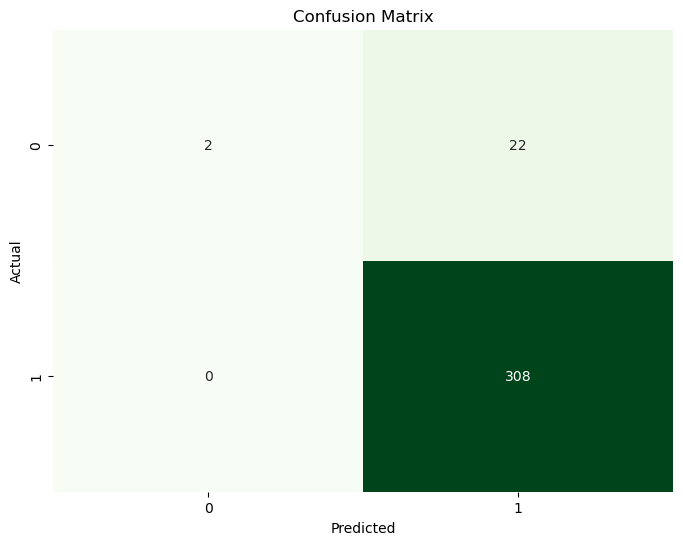

In [131]:

response = 'Diagnosis'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[predictors], df[response], test_size=0.2, random_state=42)

# Preprocessing pipeline for numeric and categorical variables
numeric_features = ['Age', 'SystolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine',
                    'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
                    'SerumElectrolytesPhosphorus', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                    'AlcoholConsumption', 'BMI', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']

categorical_features = ['Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
                        'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
                        'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins', 'AntidiabeticMedications', 'Edema', 'FatigueLevels',
                        'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure', 'OccupationalExposureChemicals',
                        'WaterQuality']


# Preprocessing pipeline with ColumnTransformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Fit preprocessing pipeline on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Fit logistic regression model using scikit-learn
model = LogisticRegression(max_iter=1000)
model.fit(X_train_processed, y_train)

# Transform test data and predict
X_test_processed = preprocessor.transform(X_test)
y_pred = model.predict(X_test_processed)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




**Model Evaluation Summary**:

*Accuracy*:

The logistic regression model achieved an accuracy of 0.93, meaning that 93% of the predictions made by the model on the test set were correct.
Classification Report:

*Precision*:

For CKD negative (class 0): 1.00
For CKD positive (class 1): 0.93

*Recall*:

For CKD negative (class 0): 0.08
For CKD positive (class 1): 1.00

*F1-Score*:

For CKD negative (class 0): 0.15
For CKD positive (class 1): 0.97

The model shows high precision and recall for class 1 (CKD positive) but performs poorly for class 0 (CKD negative), suggesting an imbalance in the dataset or the model's bias towards predicting CKD positive cases.

*Confusion Matrix*:

The confusion matrix indicates:
True negatives (correctly predicted CKD negative): 2
False positives (incorrectly predicted CKD positive): 22
False negatives (incorrectly predicted CKD negative): 0
True positives (correctly predicted CKD positive): 308

**Analysis**:

The model is highly accurate in predicting CKD positive cases but struggles with CKD negative cases. This discrepancy could be due to an imbalance in the dataset, with far more CKD positive cases than negative ones.
The low recall for class 0 (CKD negative) means the model fails to identify CKD negative patients accurately.
Potential solutions could include balancing the dataset, using techniques such as SMOTE for oversampling, or adjusting class weights in the logistic regression model to address the class imbalance.

**Next Steps**:

Consider data balancing techniques to improve the model's performance on CKD negative cases.

### ROC curve

ROC curve: Plot sensitivity vs. 1-specificity to evaluate model performance.


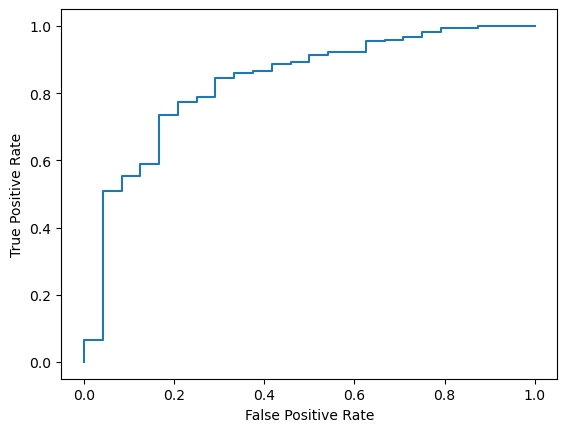

In [132]:
from sklearn import metrics

y_pred_proba = model.predict_proba(X_test_processed)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

# create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve plots True Positive Rate (TPR) against False Positive Rate (FPR).

1. TPR (Sensitivity): Proportion of actual positives correctly predicted as positives.
2. FPR (1 - Specificity): Proportion of actual negatives incorrectly predicted as positives.

Ideally, the curve should rise steeply and then plateau near the top left corner (TPR close to 1, FPR close to 0). The ROC plot does plateau at the top and the curve is above the diagonal line (FPR = TPR), indicating that the model is performing better than chance. Higher AUC suggests that the model is effective at distinguishing between the positive and negative classes across various thresholds.

There are steps in the ROC curve, as compared to a smooth curve, indicative of an imbalanced datasets, due to fewer changes in predicted probabilities for the minority class.

### Log loss

Calculate Log loss for the for the model predicting CKD and non-CKD class



In [133]:
from sklearn.metrics import log_loss

y_pred_prob = model.predict_proba(X_test_processed)
loss = log_loss(y_test, y_pred_prob)

print(f"Log Loss: {loss:.4f}")

Log Loss: 0.2048


A log loss of 0.2 indicates that the Logistical model’s predicted probabilities closely match the true probabilities of the classes, suggesting high confidence and accuracy in the model’s predictions for a classification task.

## KNN Model

Use k-Nearest Neighbors to predict the outcome of Chronic Kidney Disease based on the dataset. Use all predictor variables and/or a set of variables to train and test the model.  Use classification metrics such as accuracy, precision, recall, and F1-score to evaluate how well the k-NN model predicts CKD compared to actual outcomes in the test set. 

In [115]:
# Define parameter grid for KNN
knn_param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan']
}

# Create and evaluate KNN model. Use PCA with pca_variance_ratio of 0.95
best_knn_pipeline = tune_and_evaluate_model(KNeighborsClassifier(), knn_param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test, 
                                            use_random_search=False, use_stratified=True, add_pca=True, pca_variance_ratio=0.60)
display(best_knn_pipeline)



Training Accuracy: 0.91
Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       970
           1       1.00      0.82      0.90       970

    accuracy                           0.91      1940
   macro avg       0.92      0.91      0.91      1940
weighted avg       0.92      0.91      0.91      1940

Training ROC AUC: 1.00

Validation Accuracy: 0.67
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.45      0.17        20
           1       0.94      0.69      0.80       246

    accuracy                           0.67       266
   macro avg       0.52      0.57      0.48       266
weighted avg       0.88      0.67      0.75       266


Test Accuracy: 0.67
Test Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.50      0.18        24
           1       0.95      0.69      0.79     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=0.6))]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'Ser...
                                                   'NSAIDsUse', 'FatigueLevels',
                                                   'NauseaVomiting',
                                                   'MuscleCramps', 'Itching',
                                                   'QualityOfLifeScore',
                                                   'AlcoholConsumption', 'BMI',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', ...]),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity',
                                                   'SocioeconomicStatus',
                                                   'EducationLevel'])])),
                ('classifier', KNeighborsClassifier(n_neighbors=3))])

In [116]:

  
get_PCA_features(best_knn_pipeline)

Feature names contributing to Principal Components
Component 1: QualityOfLifeScore
Component 2: ProteinInUrine
Component 3: SerumCreatinine
Component 4: Age
Component 5: ACR
Component 6: CholesterolTriglycerides
Component 7: PhysicalActivity
Component 8: DietQuality
Component 9: NSAIDsUse
Component 10: HealthLiteracy
Component 11: BUNLevels
Component 12: FatigueLevels
Component 13: AlcoholConsumption
Component 14: NauseaVomiting
Component 15: BMI
Component 16: HemoglobinLevels


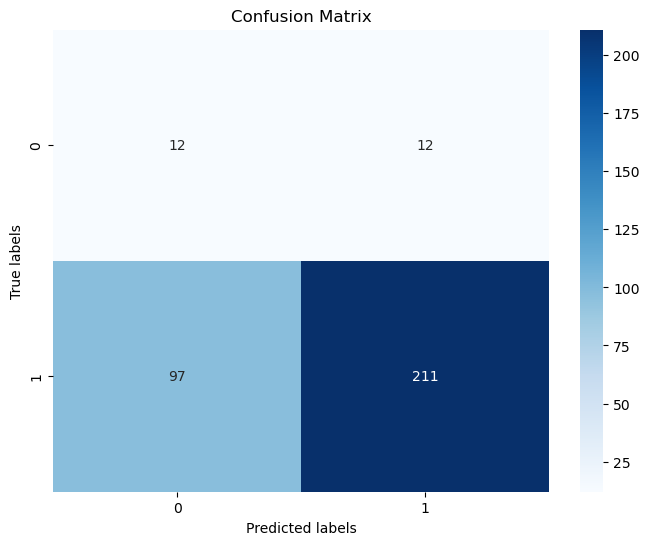

In [117]:
plot_confusion_matrix(best_knn_pipeline, X_test)


In [118]:
print_log_loss(best_knn_pipeline, X_test, y_test)

4.969750404022554


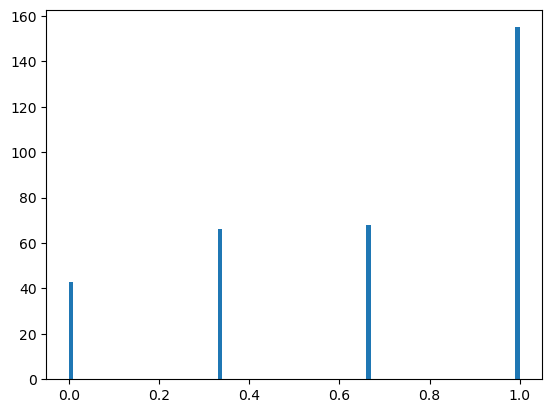

In [119]:
plot_predicted_probabilities_histogram(best_knn_pipeline, X_test)

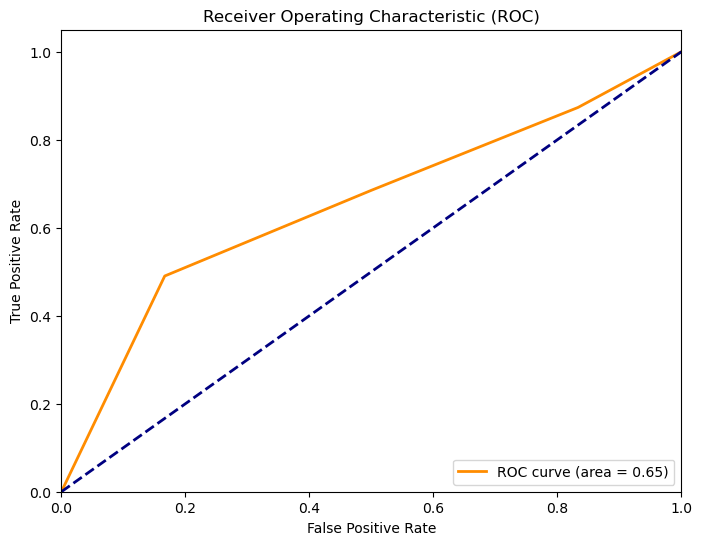

In [120]:
plot_roc_curve(best_knn_pipeline, X_test)

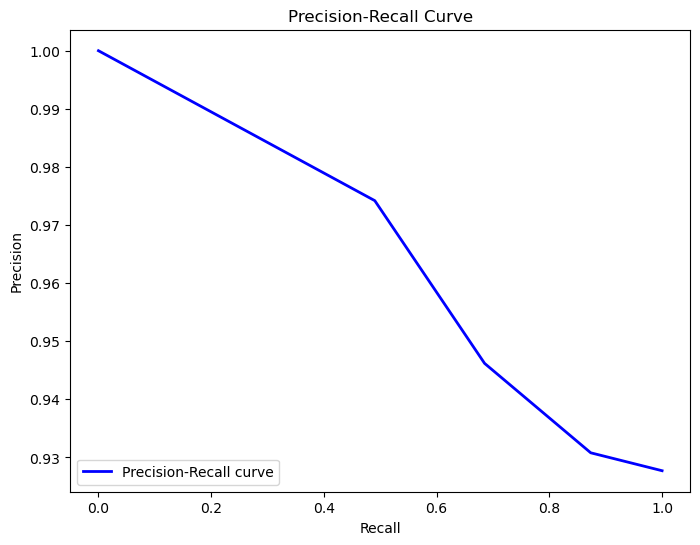

In [121]:
plot_precision_recall_curve(best_knn_pipeline, X_test)

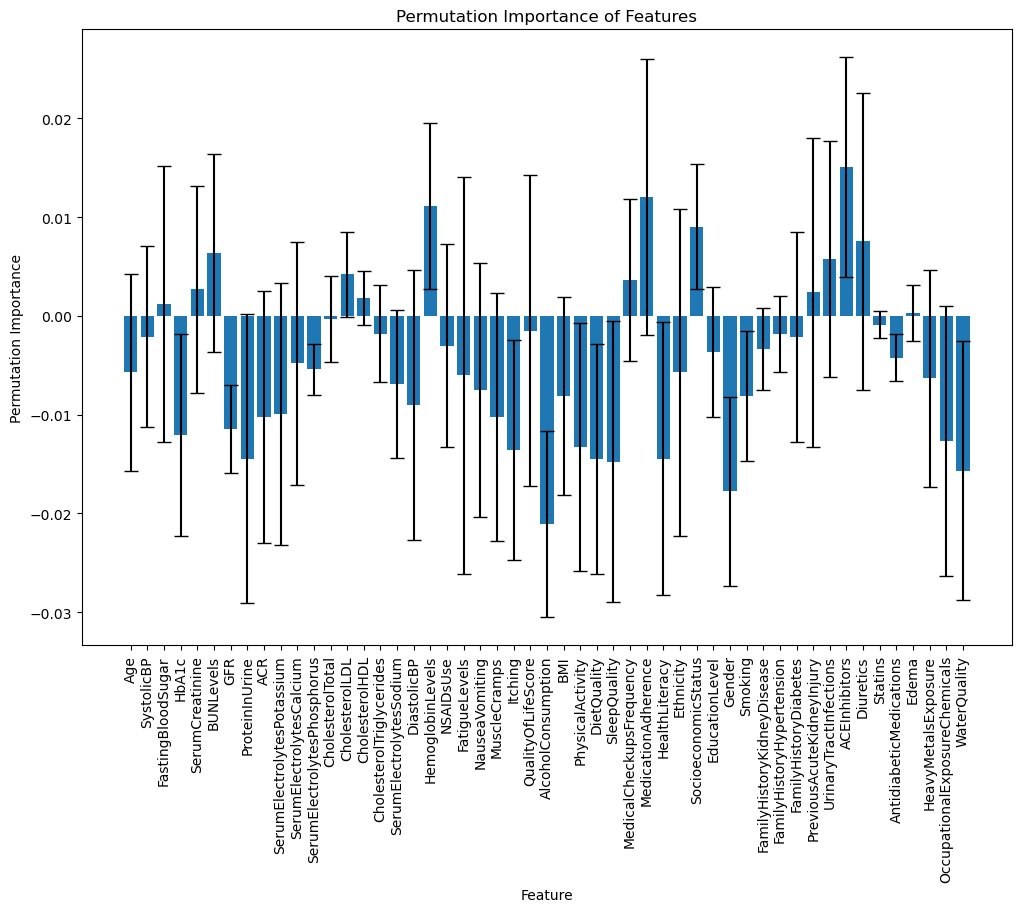

In [122]:
plot_permutation_importance(best_knn_pipeline, X_test, y_test)
                            

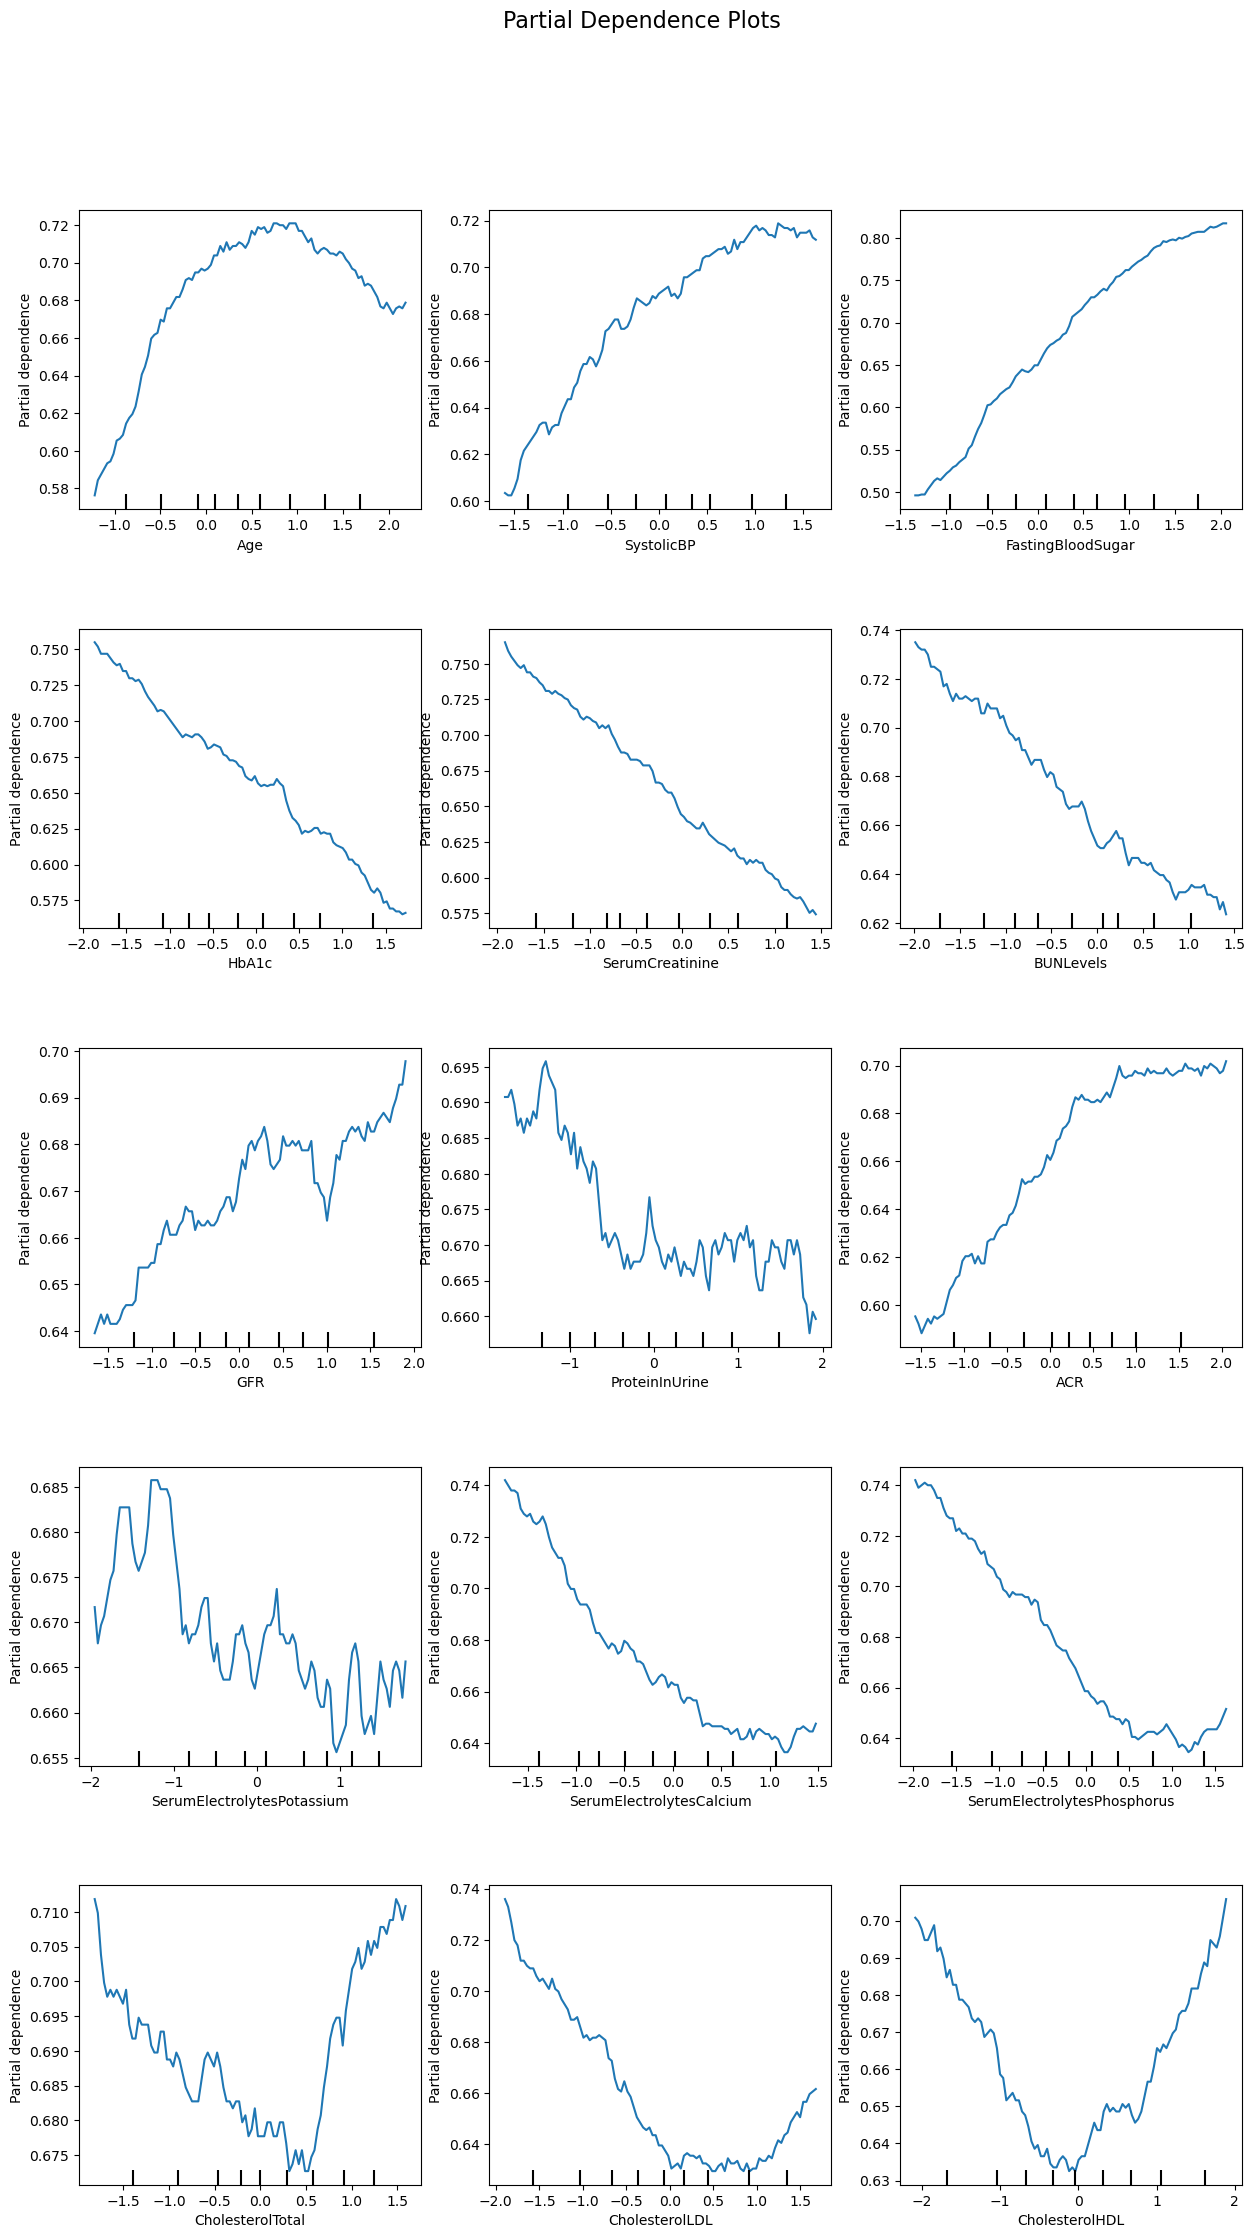

In [39]:
plot_partial_dependence_plots(best_knn_pipeline, X_test, 15)

**Observations This is based on old model from Team project 1. This needs to be updated**

Precision (ratio of correctly predicted positive observations (CKD) to the total predicted positive observations.)

1. Precision for class 0 (no CKD): 0.00. This indicates that when the model predicted no CKD, it was almost always incorrect (since TN is 0).
2. Precision for class 1 (CKD): 0.92 When the model predicted CKD, it was correct 92% of the time.

Recall (ratio of correctly predicted positive observations (CKD) to all observations in the actual class (true positives + false negatives)).

1. Recall for class 0: 0.00  None of the actual instances of no CKD were correctly identified by the model (since TN is 0).
2. Recall for class 1: 0.99 The model correctly identified CKD in 99% of the cases where CKD actually occurred.


F1-score (harmonic mean of precision and recall and a single metric that balances both measures)

1. F1-score for class 0: 0.00
2. F1-score for class 1: 0.96

Accuracy is found to be 0.918 (or 91.8%)  The model correctly predicted 91.8% of the cases in the dataset.

The confusion matrix and precision-recall metrics show a significant class imbalance. There are very few instances of no CKD (class 0), and the model struggles to correctly identify these instances. This imbalance is visible from the low values of precision and recall for class 0.

While this KNN model (n=5) shows strong performance in predicting CKD (class 1), there are significant challenges in correctly identifying instances of no CKD (class 0). Addressing these challenges could involve strategies such as data balancing techniques, refining feature selection, or exploring other classification algorithms that might better handle class imbalance.

## XGBoost Model

In [40]:
import xgboost as xgb

# Define parameter grid for XGBoost
xgboost_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1],
    'classifier__max_depth': [4, 5],
    'classifier__min_child_weight': [1, 5],
    'classifier__subsample': [0.9],
    'classifier__colsample_bytree': [0.9],
    'classifier__gamma': [0.1],
    'classifier__lambda': [1],
    'classifier__alpha': [1],
}

# Create and evaluate KNN model
best_xgboost_pipeline = tune_and_evaluate_model(xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_param_grid, X_train, y_train, X_valid, y_valid, X_test, y_test,
                                                use_random_search=False, use_stratified=True, add_pca=False)
display(best_xgboost_pipeline)

Training Accuracy: 1.00
Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       970
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1940
   macro avg       1.00      1.00      1.00      1940
weighted avg       1.00      1.00      1.00      1940

Training ROC AUC: 1.00

Validation Accuracy: 0.91
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.94      0.96      0.95       246

    accuracy                           0.91       266
   macro avg       0.65      0.61      0.62       266
weighted avg       0.90      0.91      0.90       266


Test Accuracy: 0.91
Test Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.25      0.29        24
           1       0.94      0.96      0.95     

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_transforms',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SystolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine', 'ACR',
                                                   'SerumElectrolytesPotassium',
                                                   'SerumElectrolytesCalcium',
                                                   'SerumElectrolytesPhosphorus',
                                                   'Cho...
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, lambda=1,
                               learning_rate=0.1, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=5,
                               max_leaves=None, min_child_weight=1, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None, ...))])

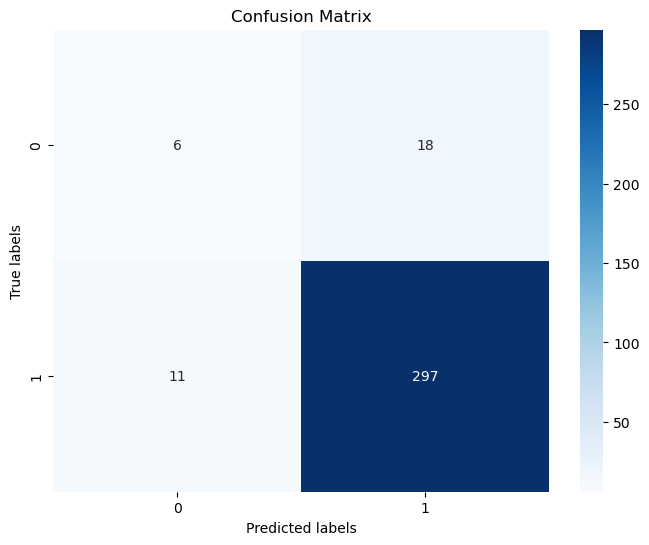

In [123]:
plot_confusion_matrix(best_xgboost_pipeline, X_test)


In [124]:
print_log_loss(best_xgboost_pipeline, X_test, y_test)

0.24893505723661208


In [125]:
get_PCA_features(best_xgboost_pipeline)

There was no PCA performed in this pipeline. Therefore not doing anything.


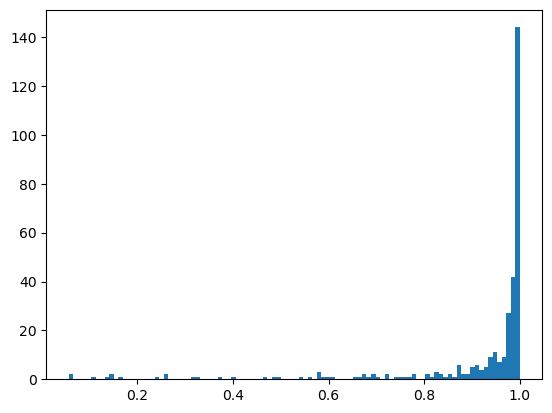

In [126]:
plot_predicted_probabilities_histogram(best_xgboost_pipeline, X_test)

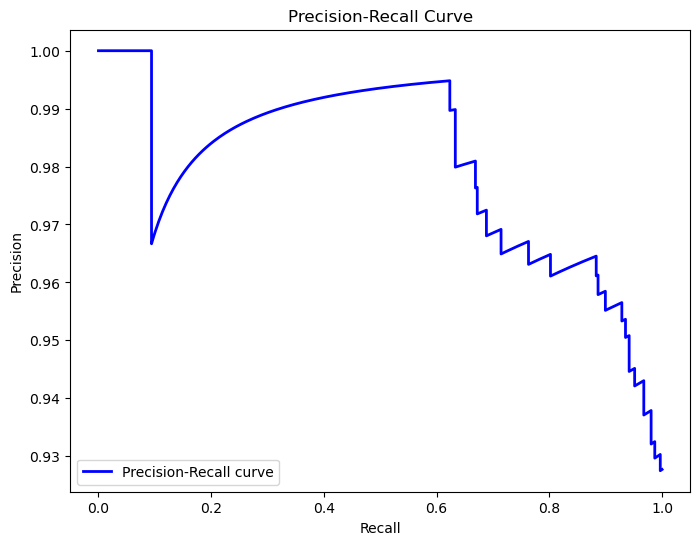

In [127]:

plot_precision_recall_curve(best_xgboost_pipeline, X_test)


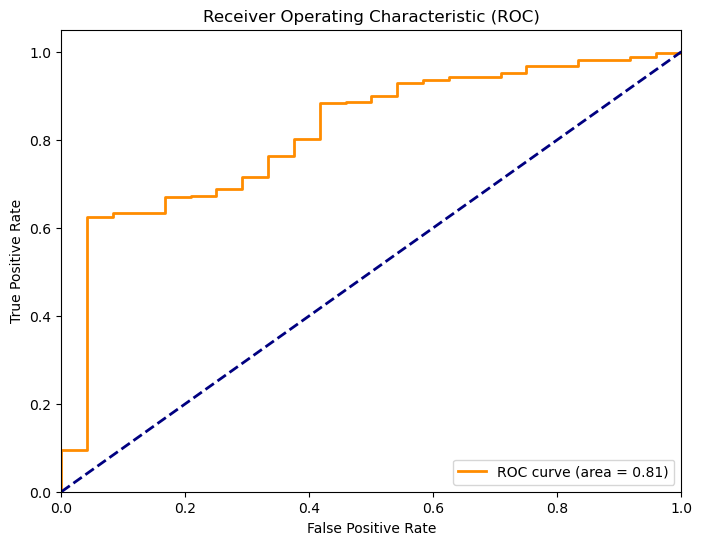

In [128]:
plot_roc_curve(best_xgboost_pipeline, X_test)

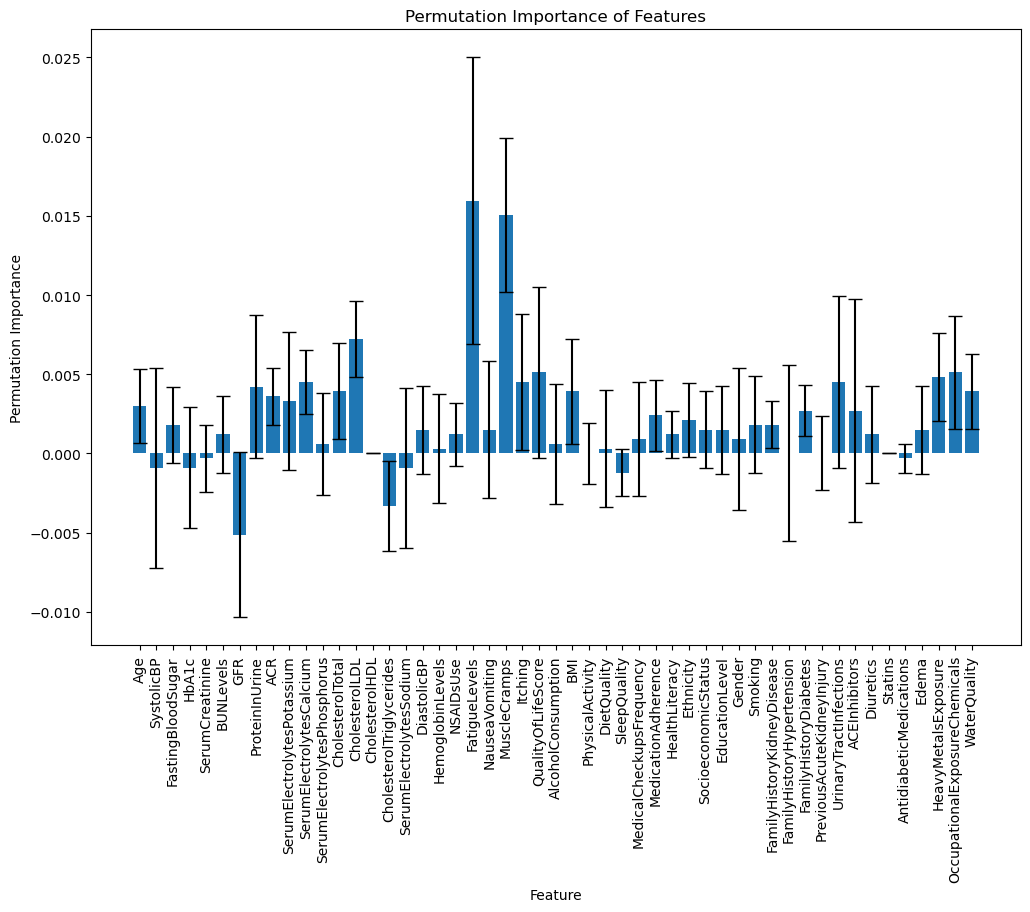

In [129]:
plot_permutation_importance(best_xgboost_pipeline, X_test, y_test)


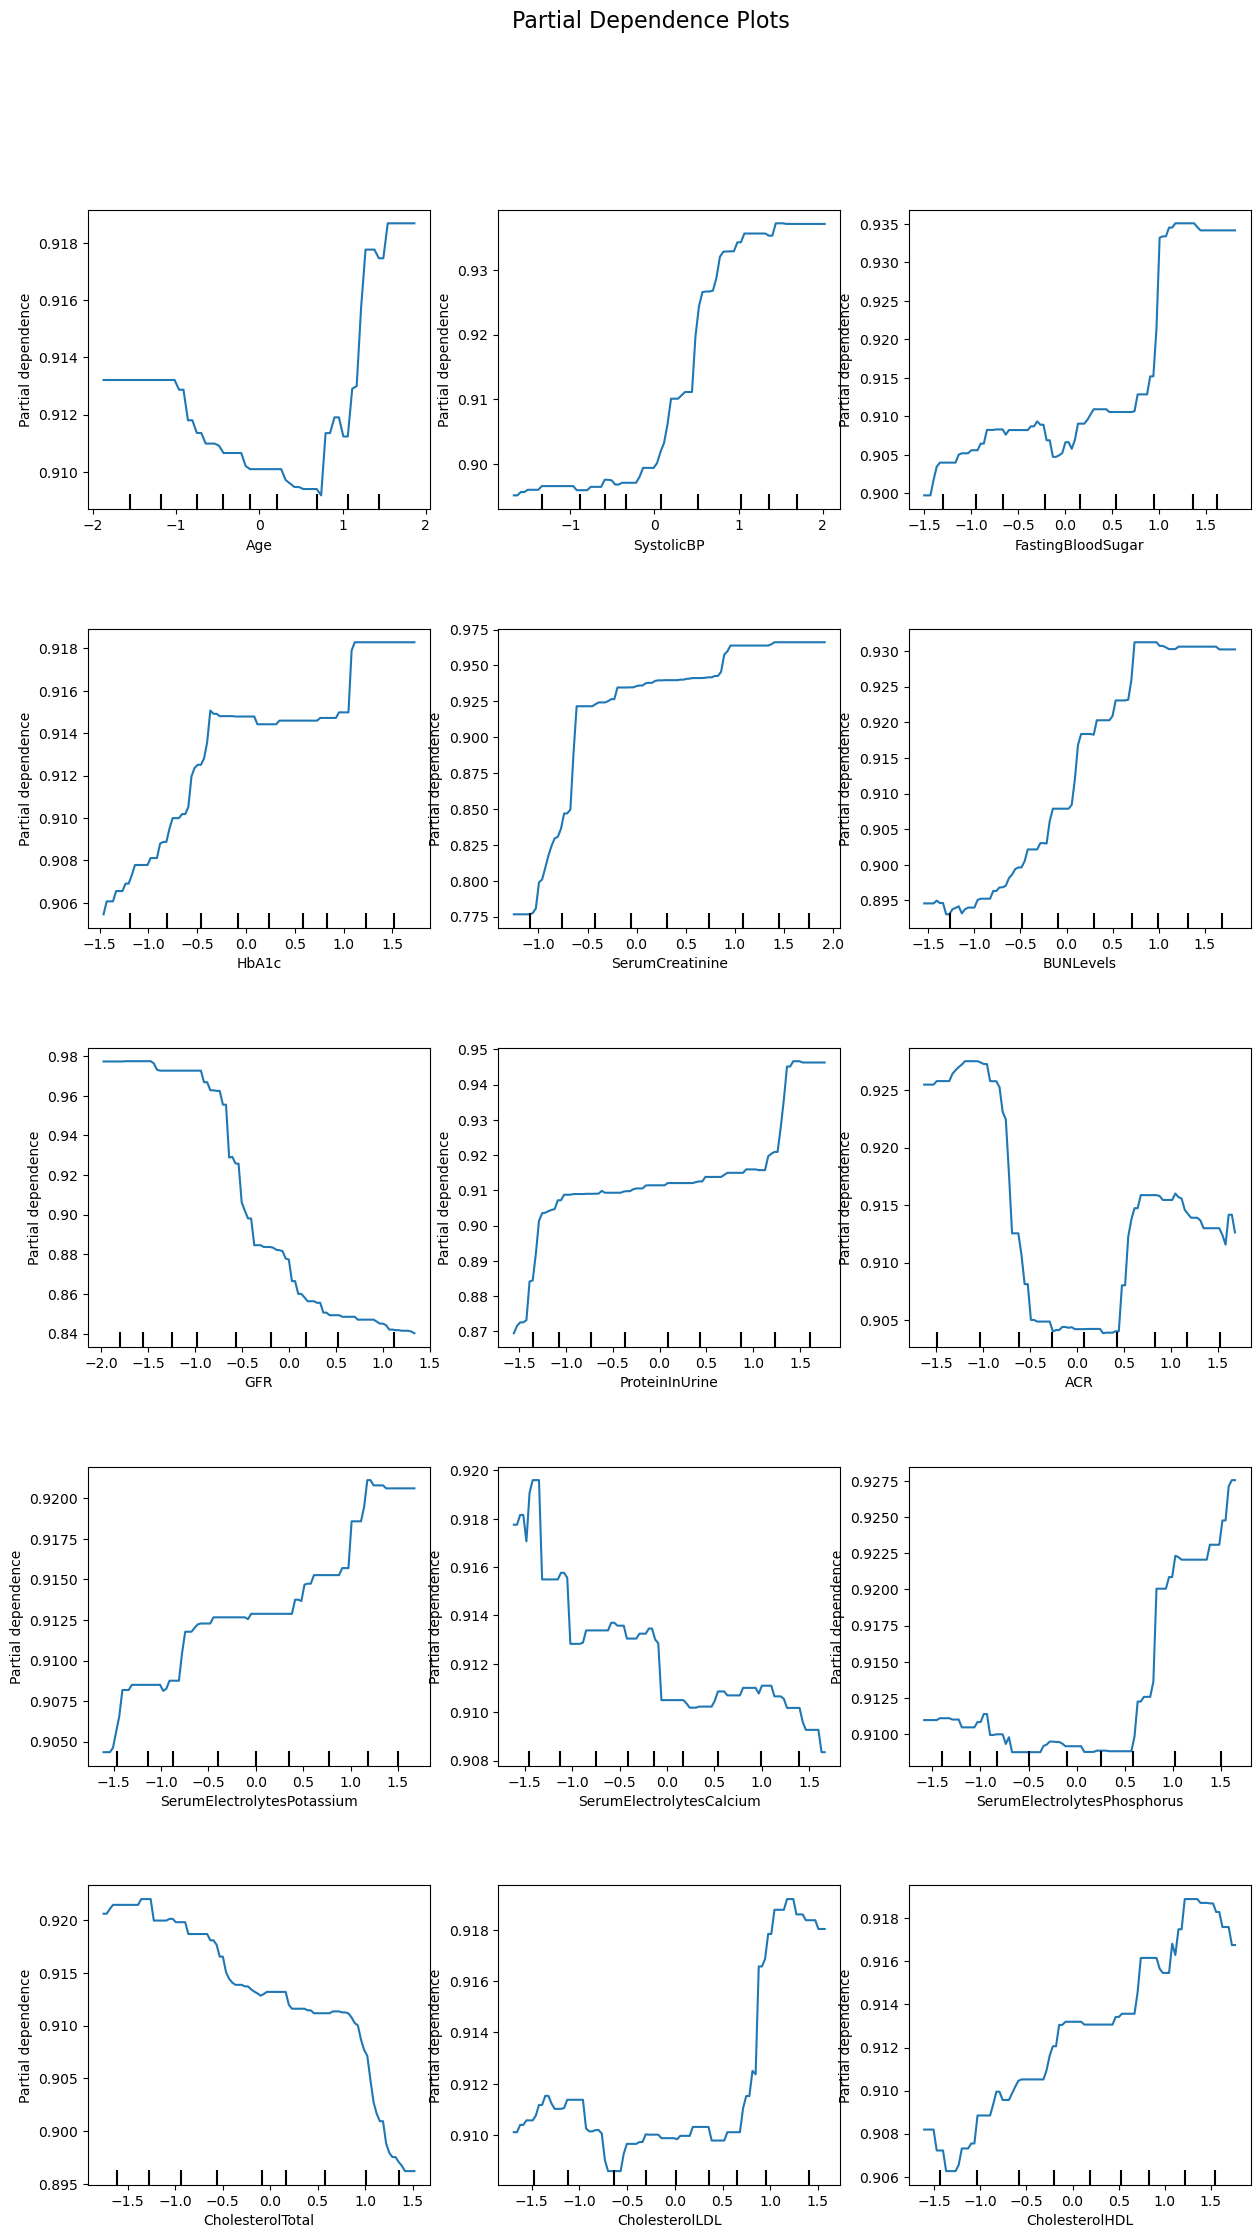

In [52]:
plot_partial_dependence_plots(best_xgboost_pipeline, X_test, 15)